# Imports & Settings

In [1]:
import warnings
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.metrics import r2_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

# Basic Data Information

In [3]:
life_expectancy_data = pd.read_csv('Life Expectancy Data.csv')
life_expectancy_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
pd.set_option('display.max_columns', None) 
life_expectancy_data.columns=['Country', 'Year', 'Status', 'Life Expectancy ', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIVAIDS','GDP', 'Population', 'Thinness 10-19',
       'Thinness 5-9', 'Income Composition', 'Schooling']
#Canada and France are mislabeled as Developing
life_expectancy_data[life_expectancy_data['Country']=='France']['Status'].replace('Developing','Developed')
life_expectancy_data[life_expectancy_data['Country']=='Canada']['Status'].replace('Developing','Developed')
life_expectancy_data.head(10)

Country  Year      Status  Life Expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   Infant Deaths  Alcohol  Percent Expenditure  Hep B  Measles   BMI  \
0             62     0.01            71.279624   65.0     1154  19.1   
1             64     0.01            73.523582   62.0      492  18.6   
2             66     0.01            73.219243   64.0      430  18.1   
3             69     0.01            78.184215   67.0     2787  17.6   
4             71     0.01             7.097109   68.0     3013  17.2   
5             74     0.01            79.679367   66.0     1989  16.7   
6             77     0.01            56.762217   63.0     2861  16.2   
7             80     0.03            25.873925   64.0     1599  15.7   
8             82     0.02            10.910156   63.0     1141  15.2   
9             84     0.03            17.171518   64.0     1990  14.7   

   U-5 Deaths  Polio  Total Expenditure  Diphtheria  HIVAIDS         GDP  \
0          83    6.0               8.16        65.0      0.1  584.259210   
1          86   58.0               8.18        62.0      0.1  612.696514   
2          89   62.0               8.13        64.0      0.1  631.744976   
3          93   67.0               8.52        67.0      0.1  669.959000   
4          97   68.0               7.87        68.0      0.1   63.537231   
5         102   66.0               9.20        66.0      0.1  553.328940   
6         106   63.0               9.42        63.0      0.1  445.893298   
7         110   64.0               8.33        64.0      0.1  373.361116   
8         113   63.0               6.73        63.0      0.1  369.835796   
9         116   58.0               7.43        58.0      0.1  272.563770   

   Population  Thinness 10-19  Thinness 5-9  Income Composition  Schooling  
0  33736494.0            17.2          17.3               0.479       10.1  
1    327582.0            17.5          17.5               0.476       10.0  
2  31731688.0            17.7          17.7               0.470        9.9  
3   3696958.0            17.9          18.0               0.463        9.8  
4   2978599.0            18.2          18.2               0.454        9.5  
5   2883167.0            18.4          18.4               0.448        9.2  
6    284331.0            18.6          18.7               0.434        8.9  
7   2729431.0            18.8          18.9               0.433        8.7  
8  26616792.0            19.0          19.1               0.415        8.4  
9   2589345.0            19.2          19.3               0.405        8.1

# Variables
Country- Country    
Year- Year    
Status- Developed or Developing status    
Life Expectancy- Age(years)   
Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)         
Infant Deaths- Number of Infant Deaths per 1000 population        
Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)   
Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)   
Measles- number of reported measles cases per 1000 population    
BMI- Average Body Mass Index of entire population    
U-5 Deaths- Number of under-five deaths per 1000 population    
Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)    
Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)    
Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)      
HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)    
GDP- Gross Domestic Product per capita(in USD)   
Population- Population 
Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)    
Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)    
Income Composition- Human Development Index in terms of income composition of resources(0-1)  
Schooling- Number of years of Schooling 

AxesSubplot(0.125,0.11;0.698618x0.77)


Year  Life Expectancy   Adult Mortality  Infant Deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  Percent Expenditure        Hep B        Measles  \
count  2744.000000          2938.000000  2385.000000    2938.000000   
mean      4.602861           738.251295    80.940461    2419.592240   
std       4.052413          1987.914858    25.070016   11467.272489   
min       0.010000             0.000000     1.000000       0.000000   
25%       0.877500             4.685343    77.000000       0.000000   
50%       3.755000            64.912906    92.000000      17.000000   
75%       7.702500           441.534144    97.000000     360.250000   
max      17.870000         19479.911610    99.000000  212183.000000   

               BMI   U-5 Deaths        Polio  Total Expenditure   Diphtheria  \
count  2904.000000  2938.000000  2919.000000         2712.00000  2919.000000   
mean     38.321247    42.035739    82.550188            5.93819    82.324084   
std      20.044034   160.445548    23.428046            2.49832    23.716912   
min       1.000000     0.000000     3.000000            0.37000     2.000000   
25%      19.300000     0.000000    78.000000            4.26000    78.000000   
50%      43.500000     4.000000    93.000000            5.75500    93.000000   
75%      56.200000    28.000000    97.000000            7.49250    97.000000   
max      87.300000  2500.000000    99.000000           17.60000    99.000000   

           HIVAIDS            GDP    Population  Thinness 10-19  Thinness 5-9  \
count  2938.000000    2490.000000  2.286000e+03     2904.000000   2904.000000   
mean      1.742103    7483.158469  1.275338e+07        4.839704      4.870317   
std       5.077785   14270.169342  6.101210e+07        4.420195      4.508882   
min       0.100000       1.681350  3.400000e+01        0.100000      0.100000   
25%       0.100000     463.935626  1.957932e+05        1.600000      1.500000   
50%       0.100000    1766.947595  1.386542e+06        3.300000      3.300000   
75%       0.800000    5910.806335  7.420359e+06        7.200000      7.200000   
max      50.600000  119172.741800  1.293859e+09       27.700000     28.600000   

       Income Composition    Schooling  
count         2771.000000  2775.000000  
mean             0.627551    11.992793  
std              0.210904     3.358920  
min              0.000000     0.000000  
25%              0.493000    10.100000  
50%              0.677000    12.300000  
75%              0.779000    14.300000  
max              0.948000    20.700000

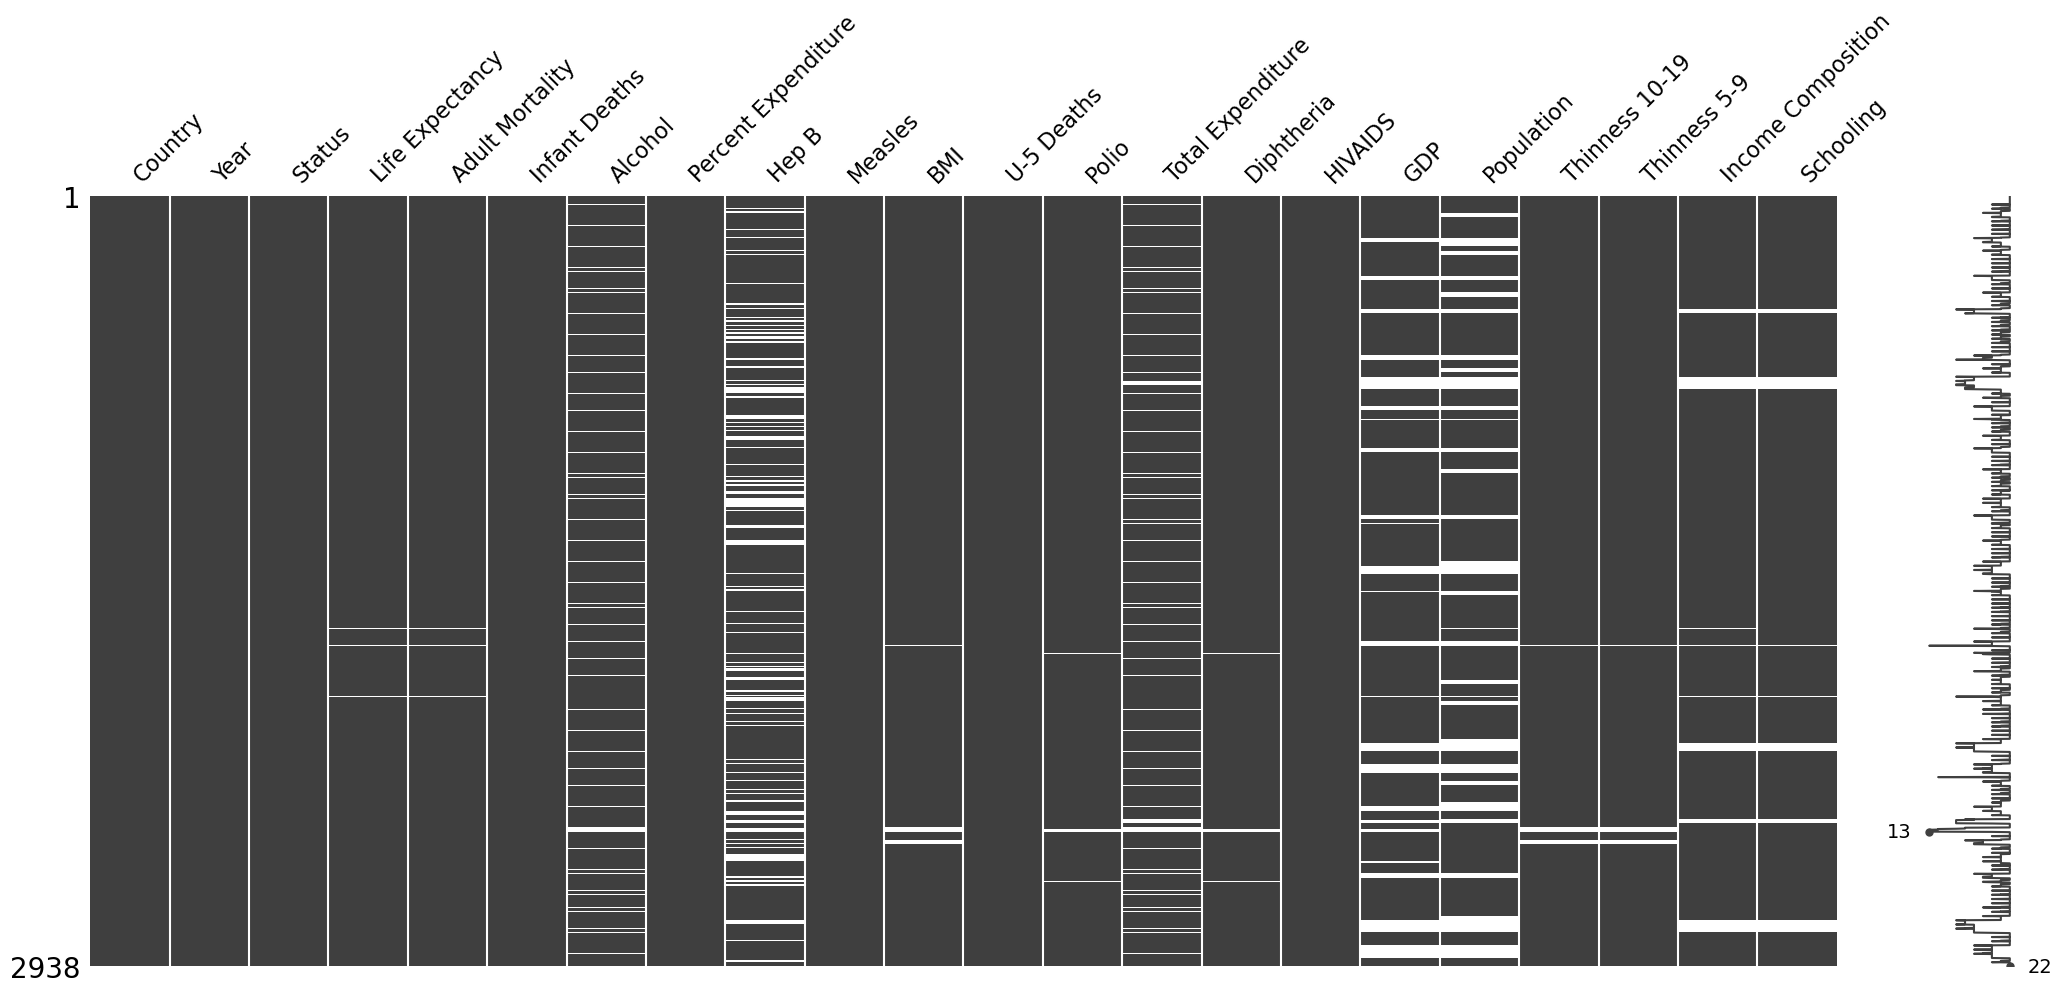

In [5]:
import missingno as msno
print(msno.matrix(life_expectancy_data))
life_expectancy_data.describe()

In [6]:
life_expectancy_data.head().T

0            1            2            3  \
Country              Afghanistan  Afghanistan  Afghanistan  Afghanistan   
Year                        2015         2014         2013         2012   
Status                Developing   Developing   Developing   Developing   
Life Expectancy             65.0         59.9         59.9         59.5   
Adult Mortality            263.0        271.0        268.0        272.0   
Infant Deaths                 62           64           66           69   
Alcohol                     0.01         0.01         0.01         0.01   
Percent Expenditure    71.279624    73.523582    73.219243    78.184215   
Hep B                       65.0         62.0         64.0         67.0   
Measles                     1154          492          430         2787   
BMI                         19.1         18.6         18.1         17.6   
U-5 Deaths                    83           86           89           93   
Polio                        6.0         58.0         62.0         67.0   
Total Expenditure           8.16         8.18         8.13         8.52   
Diphtheria                  65.0         62.0         64.0         67.0   
HIVAIDS                      0.1          0.1          0.1          0.1   
GDP                    584.25921   612.696514   631.744976      669.959   
Population            33736494.0     327582.0   31731688.0    3696958.0   
Thinness 10-19              17.2         17.5         17.7         17.9   
Thinness 5-9                17.3         17.5         17.7         18.0   
Income Composition         0.479        0.476         0.47        0.463   
Schooling                   10.1         10.0          9.9          9.8   

                               4  
Country              Afghanistan  
Year                        2011  
Status                Developing  
Life Expectancy             59.2  
Adult Mortality            275.0  
Infant Deaths                 71  
Alcohol                     0.01  
Percent Expenditure     7.097109  
Hep B                       68.0  
Measles                     3013  
BMI                         17.2  
U-5 Deaths                    97  
Polio                       68.0  
Total Expenditure           7.87  
Diphtheria                  68.0  
HIVAIDS                      0.1  
GDP                    63.537231  
Population             2978599.0  
Thinness 10-19              18.2  
Thinness 5-9                18.2  
Income Composition         0.454  
Schooling                    9.5

In [7]:
# Filling Missing Values
life_expectancy_data= life_expectancy_data.fillna(life_expectancy_data.mean())

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [8]:
life_expectancy_data.isnull().sum()

Country                0
Year                   0
Status                 0
Life Expectancy        0
Adult Mortality        0
Infant Deaths          0
Alcohol                0
Percent Expenditure    0
Hep B                  0
Measles                0
BMI                    0
U-5 Deaths             0
Polio                  0
Total Expenditure      0
Diphtheria             0
HIVAIDS                0
GDP                    0
Population             0
Thinness 10-19         0
Thinness 5-9           0
Income Composition     0
Schooling              0
dtype: int64

Describing the dataset. The dataset consists of examples from 193 different countries from different years. It is shown that minimum value for year is 2000 and maximum is 2015; it consists of 15 year period. Also the status column is binary, can be converted to 1 and 0s. The population column has huge values in it, which is expected. The values can be showed as millions.

In [9]:
life_expectancy_data.describe(include='all')

Country         Year      Status  Life Expectancy   \
count          2938  2938.000000        2938       2938.000000   
unique          193          NaN           2               NaN   
top     Afghanistan          NaN  Developing               NaN   
freq             16          NaN        2426               NaN   
mean            NaN  2007.518720         NaN         69.224932   
std             NaN     4.613841         NaN          9.507640   
min             NaN  2000.000000         NaN         36.300000   
25%             NaN  2004.000000         NaN         63.200000   
50%             NaN  2008.000000         NaN         72.000000   
75%             NaN  2012.000000         NaN         75.600000   
max             NaN  2015.000000         NaN         89.000000   

        Adult Mortality  Infant Deaths      Alcohol  Percent Expenditure  \
count       2938.000000    2938.000000  2938.000000          2938.000000   
unique              NaN            NaN          NaN                  NaN   
top                 NaN            NaN          NaN                  NaN   
freq                NaN            NaN          NaN                  NaN   
mean         164.796448      30.303948     4.602861           738.251295   
std          124.080302     117.926501     3.916288          1987.914858   
min            1.000000       0.000000     0.010000             0.000000   
25%           74.000000       0.000000     1.092500             4.685343   
50%          144.000000       3.000000     4.160000            64.912906   
75%          227.000000      22.000000     7.390000           441.534144   
max          723.000000    1800.000000    17.870000         19479.911610   

              Hep B        Measles          BMI   U-5 Deaths        Polio  \
count   2938.000000    2938.000000  2938.000000  2938.000000  2938.000000   
unique          NaN            NaN          NaN          NaN          NaN   
top             NaN            NaN          NaN          NaN          NaN   
freq            NaN            NaN          NaN          NaN          NaN   
mean      80.940461    2419.592240    38.321247    42.035739    82.550188   
std       22.586855   11467.272489    19.927677   160.445548    23.352143   
min        1.000000       0.000000     1.000000     0.000000     3.000000   
25%       80.940461       0.000000    19.400000     0.000000    78.000000   
50%       87.000000      17.000000    43.000000     4.000000    93.000000   
75%       96.000000     360.250000    56.100000    28.000000    97.000000   
max       99.000000  212183.000000    87.300000  2500.000000    99.000000   

        Total Expenditure   Diphtheria      HIVAIDS            GDP  \
count         2938.000000  2938.000000  2938.000000    2938.000000   
unique                NaN          NaN          NaN            NaN   
top                   NaN          NaN          NaN            NaN   
freq                  NaN          NaN          NaN            NaN   
mean             5.938190    82.324084     1.742103    7483.158469   
std              2.400274    23.640073     5.077785   13136.800417   
min              0.370000     2.000000     0.100000       1.681350   
25%              4.370000    78.000000     0.100000     580.486996   
50%              5.938190    93.000000     0.100000    3116.561755   
75%              7.330000    97.000000     0.800000    7483.158469   
max             17.600000    99.000000    50.600000  119172.741800   

          Population  Thinness 10-19  Thinness 5-9  Income Composition  \
count   2.938000e+03     2938.000000   2938.000000         2938.000000   
unique           NaN             NaN           NaN                 NaN   
top              NaN             NaN           NaN                 NaN   
freq             NaN             NaN           NaN                 NaN   
mean    1.275338e+07        4.839704      4.870317            0.627551   
std     5.381546e+07        4.394535      4.482708            0.204820   
min     3.400000e+01  

In [10]:
life_expectancy_data['Population'] = life_expectancy_data['Population']/1000000
life_expectancy_data

Country  Year      Status  Life Expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      Infant Deaths  Alcohol  Percent Expenditure  Hep B  Measles   BMI  \
0                62     0.01            71.279624   65.0     1154  19.1   
1                64     0.01            73.523582   62.0      492  18.6   
2                66     0.01            73.219243   64.0      430  18.1   
3                69     0.01            78.184215   67.0     2787  17.6   
4                71     0.01             7.097109   68.0     3013  17.2   
...             ...      ...                  ...    ...      ...   ...   
2933             27     4.36             0.000000   68.0       31  27.1   
2934             26     4.06             0.000000    7.0      998  26.7   
2935             25     4.43             0.000000   73.0      304  26.3   
2936             25     1.72             0.000000   76.0      529  25.9   
2937             24     1.68             0.000000   79.0     1483  25.5   

      U-5 Deaths  Polio  Total Expenditure  Diphtheria  HIVAIDS         GDP  \
0             83    6.0               8.16        65.0      0.1  584.259210   
1             86   58.0               8.18        62.0      0.1  612.696514   
2             89   62.0               8.13        64.0      0.1  631.744976   
3             93   67.0               8.52        67.0      0.1  669.959000   
4             97   68.0               7.87        68.0      0.1   63.537231   
...          ...    ...                ...         ...      ...         ...   
2933          42   67.0               7.13        65.0     33.6  454.366654   
2934          41    7.0               6.52        68.0     36.7  453.351155   
2935          40   73.0               6.53        71.0     39.8   57.348340   
2936          39   76.0               6.16        75.0     42.1  548.587312   
2937          39   78.0               7.10        78.0     43.5  547.358878   

      Population  Thinness 10-19  Thinness 5-9  Income Composition  Schooling  
0      33.736494            17.2          17.3               0.479       10.1  
1       0.327582            17.5          17.5               0.476       10.0  
2      31.731688            17.7          17.7               0.470        9.9  
3       3.696958            17.9          18.0               0.463        9.8  
4       2.978599            18.2          18.2               0.454        9.5  
...          ...             ...           ...                 ...        ...  
2933   12.777511             9.4           9.4               0.407        9.2  
2934   12.633897             9.8           9.9               0.418        9.5  
2935    0.125525             1.2           1.3               0.427       10.0  
2936   12.366165             1.6           1.7               0.427        9.8  
2937   12.222251            11.0          11.2               0.434        9.8  

[2938 rows x 22 columns]

Dropping the examples with missing values. Now, the dataset has no missing values.

In [11]:
life_expectancy_data = life_expectancy_data.dropna(axis=0)
life_expectancy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2938 non-null   object 
 1   Year                 2938 non-null   int64  
 2   Status               2938 non-null   object 
 3   Life Expectancy      2938 non-null   float64
 4   Adult Mortality      2938 non-null   float64
 5   Infant Deaths        2938 non-null   int64  
 6   Alcohol              2938 non-null   float64
 7   Percent Expenditure  2938 non-null   float64
 8   Hep B                2938 non-null   float64
 9   Measles              2938 non-null   int64  
 10  BMI                  2938 non-null   float64
 11  U-5 Deaths           2938 non-null   int64  
 12  Polio                2938 non-null   float64
 13  Total Expenditure    2938 non-null   float64
 14  Diphtheria           2938 non-null   float64
 15  HIVAIDS              2938 non-null   f

Looking at Turkeys numbers.

In [12]:
Eswatini =life_expectancy_data[life_expectancy_data['Country'] == 'Swaziland']
Eswatini

Country  Year      Status  Life Expectancy   Adult Mortality  \
2489  Swaziland  2015  Developing              58.9            373.0   
2490  Swaziland  2014  Developing              58.4            382.0   
2491  Swaziland  2013  Developing              57.6            393.0   
2492  Swaziland  2012  Developing              56.5            412.0   
2493  Swaziland  2011  Developing              55.0            438.0   
2494  Swaziland  2010  Developing              53.6            459.0   
2495  Swaziland  2009  Developing              52.6             46.0   
2496  Swaziland  2008  Developing              51.4            477.0   
2497  Swaziland  2007  Developing              50.0             51.0   
2498  Swaziland  2006  Developing              47.8            564.0   
2499  Swaziland  2005  Developing              46.0             63.0   
2500  Swaziland  2004  Developing              45.6             69.0   
2501  Swaziland  2003  Developing              45.9              6.0   
2502  Swaziland  2002  Developing              46.4            587.0   
2503  Swaziland  2001  Developing              47.1            568.0   
2504  Swaziland  2000  Developing              48.4            536.0   

      Infant Deaths   Alcohol  Percent Expenditure  Hep B  Measles   BMI  \
2489              2  4.602861             0.000000    9.0        0  32.3   
2490              2  0.010000           574.389510   98.0        0  31.8   
2491              2  0.010000           708.955665   98.0        0  31.2   
2492              2  0.010000           720.233393   95.0        0   3.7   
2493              2  5.200000           735.709098   91.0        0   3.2   
2494              2  4.930000            56.936706   89.0      313  29.7   
2495              3  4.900000            47.616452   88.0       26  29.3   
2496              3  4.870000           413.006303    9.0        1  28.9   
2497              3  5.550000            43.366500   92.0        0  28.5   
2498              3  5.530000           437.080244   93.0        0  28.2   
2499              3  5.080000           372.165147   95.0        0  27.8   
2500              3  5.780000            37.438577   93.0        0  27.4   
2501              3  5.650000             2.819124    9.0      350  27.1   
2502              3  5.520000           131.042127   88.0       37  26.7   
2503              3  6.720000           143.619732   86.0       49  26.3   
2504              3  7.190000            25.216833   83.0       10  25.9   

      U-5 Deaths  Polio  Total Expenditure  Diphtheria  HIVAIDS          GDP  \
2489           3   84.0            5.93819         9.0      7.1  3136.925110   
2490           3   98.0            9.25000        98.0      7.3  3464.351690   
2491           3   98.0            9.66000        98.0      9.8  3598.759720   
2492           3   92.0            8.76000        95.0     12.2  3851.515470   
2493           3   85.0            8.61000        91.0     15.7  3934.273250   
2494           4   89.0            8.47000        89.0     21.6   369.239336   
2495           4   89.0            8.46000        88.0     33.7   332.517125   
2496           4   89.0            8.19000        88.0     40.2  2842.438422   
2497           4   88.0            7.50000        87.0     40.7   347.487980   
2498           4   88.0            6.81000        87.0     43.7  2937.367230   
2499           4   88.0            6.80000        86.0     49.1  2873.862141   
2500           4   88.0            5.88000        86.0     50.3  2529.633557   
2501           4   87.0            5.71000        85.0     50.6    22.994490   
2502           4   87.0            5.16000        85.0     49.9  1324.996228   
2503           4   87.0            5.11000        84.0     48.8  1437.634951   
2504           4   87.0            5.26000        84.0     46.4  1637.456700   

      Population  Thinness 10-19  Thinness 5-9  Income Composition  Schooling  
2489    0.131911             4.0           4.1   

In [14]:
life_expectancy_data.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy ', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B', 'Measles',
       'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
       'HIVAIDS', 'GDP', 'Population', 'Thinness 10-19', 'Thinness 5-9',
       'Income Composition', 'Schooling'],
      dtype='object')

This plot shows that Swaziland's life expectancy was 48.5 at year 2000, hit the bottom with 45.5 at 2004. Then it increases lineary.

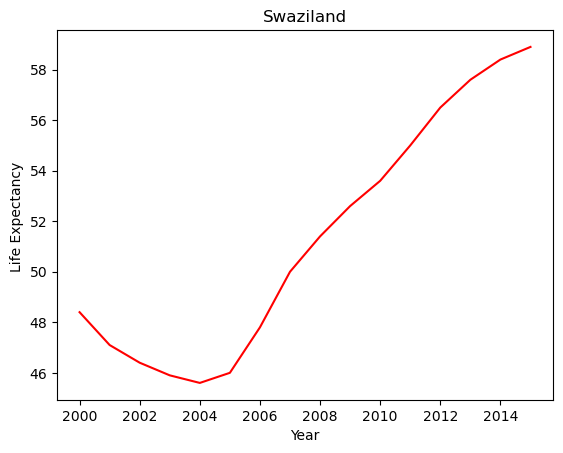

In [15]:
plt.plot(Eswatini['Year'], Eswatini['Life Expectancy '], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy ')
plt.title("Swaziland")
plt.show()

This boxplot shows that developed countries are stable because the range of the live expectancy age of developed countries is short, also the developing countries may have very different life expenctacy rates. 

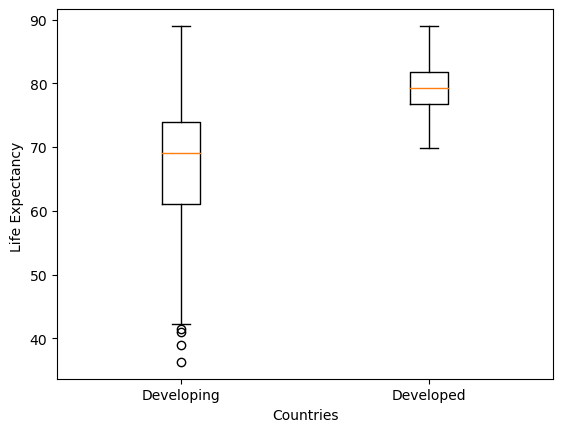

In [17]:
plt.boxplot([life_expectancy_data[life_expectancy_data['Status']=='Developing']['Life Expectancy '], life_expectancy_data[life_expectancy_data['Status']=='Developed']['Life Expectancy ']], labels=['Developing','Developed'])
plt.ylabel('Life Expectancy ')
plt.xlabel('Countries')
plt.show()

This dataframe shows the countries with lowest and highest life expectancy. We can see African countries generally have the lowest life expectancy and the European ones have the highest.

In [18]:
life_expectancy_data.sort_values("Life Expectancy ")

Country  Year      Status  Life Expectancy   Adult Mortality  \
1127         Haiti  2010  Developing              36.3            682.0   
2312  Sierra Leone  2000  Developing              39.0            533.0   
2311  Sierra Leone  2001  Developing              41.0            519.0   
2309  Sierra Leone  2003  Developing              41.5             57.0   
2308  Sierra Leone  2004  Developing              42.3            496.0   
...            ...   ...         ...               ...              ...   
915        Finland  2014  Developing              89.0             78.0   
1293         Italy  2004   Developed              89.0             66.0   
241        Belgium  2014   Developed              89.0             76.0   
2513        Sweden  2007   Developed              89.0             63.0   
938         France  2007  Developing              89.0             89.0   

      Infant Deaths  Alcohol  Percent Expenditure      Hep B  Measles   BMI  \
1127             23     5.76            36.292918  80.940461        0  44.2   
2312             29     3.97            20.395683  80.940461     3575  17.2   
2311             30     4.21            33.346915  80.940461      649  17.5   
2309             30     4.07            38.614732  80.940461      586  18.4   
2308             30     3.99            38.524548  80.940461        7  18.8   
...             ...      ...                  ...        ...      ...   ...   
915               0     8.80          6164.455402  80.940461        0  61.7   
1293              2     8.98          4270.914882  96.000000      599  57.6   
241               0    12.60          7163.348923  98.000000       70  63.4   
2513              0     6.90          7593.391622  80.940461        1  56.1   
938               3    12.20            64.737149  42.000000       39  58.6   

      U-5 Deaths  Polio  Total Expenditure  Diphtheria  HIVAIDS           GDP  \
1127          58   66.0               8.90        66.0      1.9    662.279518   
2312          48   46.0              13.63        44.0      1.2    139.314773   
2311          48   38.0              11.83        38.0      1.5    227.779471   
2309          47   66.0              11.69        73.0      1.9    263.761831   
2308          47   69.0              11.66        65.0      2.1    263.145817   
...          ...    ...                ...         ...      ...           ...   
915            0   98.0               9.68        98.0      0.1  49914.618640   
1293           3   97.0               8.49        94.0      0.1  31174.561180   
241            1   99.0               1.59        99.0      0.1  47439.396840   
2513           0   98.0               8.92        98.0      0.1  53324.379370   
938            3   99.0               1.45        98.0      0.1    416.583970   

      Population  Thinness 10-19  Thinness 5-9  Income Composition  Schooling  
1127    9.999617             4.0           4.0               0.470        8.6  
2312    4.564297             1.3           1.4               0.292        6.7  
2311    4.739147             1.1           1.2               0.302        7.0  
2309    5.199549             9.7           9.8               0.322        7.4  
2308    5.439695             9.5           9.5               0.332        7.6  
...          ...             ...           ...                 ...        ...  
915     5.461512             0.9           0.8               0.890       17.0  
1293   57.685327             0.5           0.5               0.846       15.6  
241     0.112957             1.0           1.0               0.890       16.3  
2513    0.914892             1.3           1.3               0.895       15.8  
938     6.416229             0.6           0.6               0.873       16.1  

[2938 rows x 22 columns]

Checking the types of the features and the number of non-null examples.
There are missing values on every feature except Country, Year, Status, infant deaths, percentage expenditure, Measles, under-five deaths and HIV/AIDS. Also, Country and Status features are objects. Before feeding the dataset to the model, they need to be dealt.

In [19]:
life_expectancy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2938 non-null   object 
 1   Year                 2938 non-null   int64  
 2   Status               2938 non-null   object 
 3   Life Expectancy      2938 non-null   float64
 4   Adult Mortality      2938 non-null   float64
 5   Infant Deaths        2938 non-null   int64  
 6   Alcohol              2938 non-null   float64
 7   Percent Expenditure  2938 non-null   float64
 8   Hep B                2938 non-null   float64
 9   Measles              2938 non-null   int64  
 10  BMI                  2938 non-null   float64
 11  U-5 Deaths           2938 non-null   int64  
 12  Polio                2938 non-null   float64
 13  Total Expenditure    2938 non-null   float64
 14  Diphtheria           2938 non-null   float64
 15  HIVAIDS              2938 non-null   f

In [21]:
#Countries with the Highest Life Expectancy
country_vs_life = life_expectancy_data.groupby('Country', as_index = False)['Life Expectancy '].mean()
country_vs_life.sort_values(by = 'Life Expectancy ', ascending = False).head(10)

Country  Life Expectancy 
84         Japan          82.53750
165       Sweden          82.51875
75       Iceland          82.44375
166  Switzerland          82.33125
60        France          82.21875
82         Italy          82.18750
160        Spain          82.06875
7      Australia          81.81250
125       Norway          81.79375
30        Canada          81.68750

In [23]:
#Countries with the Lowest Life Expectancy
country_vs_life.sort_values(by = 'Life Expectancy ', ascending = True).head(10)

Country  Life Expectancy 
152              Sierra Leone          46.11250
31   Central African Republic          48.51250
94                    Lesotho          48.78125
3                      Angola          49.01875
100                    Malawi          49.89375
32                       Chad          50.38750
44              Côte d'Ivoire          50.38750
192                  Zimbabwe          50.48750
164                 Swaziland          51.32500
123                   Nigeria          51.35625

# DATA VISUALIZATION

In this section, I'll ask several different questions I'm curious about and then answer them with visualizations. Any interesting observations will also be noted.

This plot shows that the countries with high GDP (Gross domestic product) have high life expectancy.

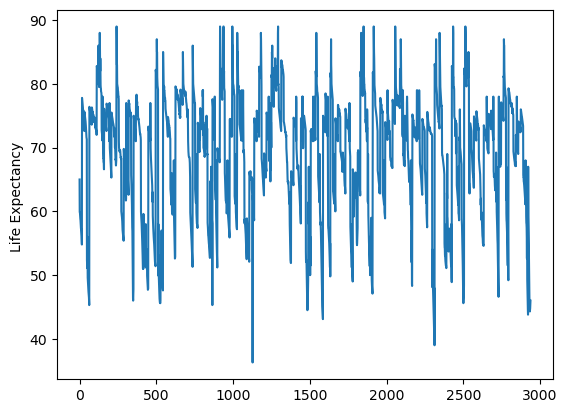

In [25]:
sns.lineplot(life_expectancy_data['Life Expectancy '])
plt.show()

In [26]:
life_expectancy_data['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


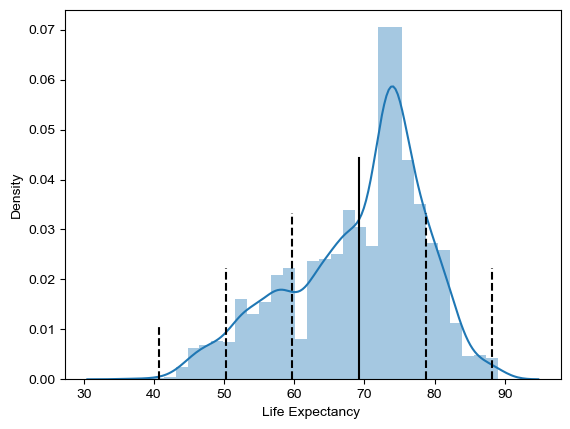

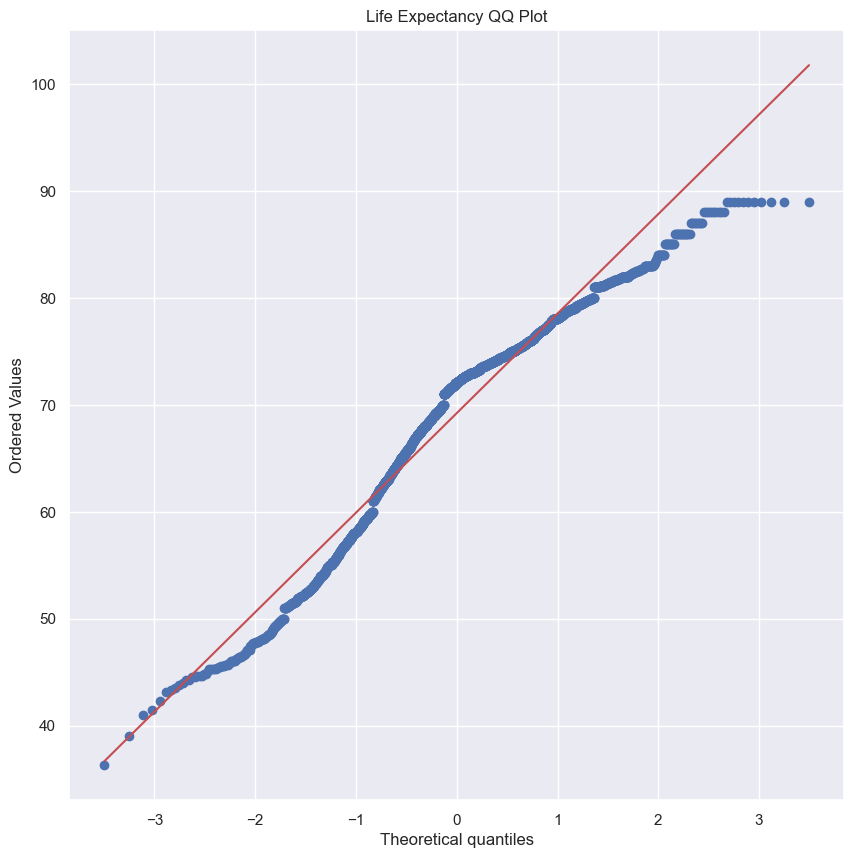

ShapiroResult(statistic=0.9563312530517578, pvalue=8.011480975249593e-29)


In [27]:
#Life Expectancy 
sns.distplot(life_expectancy_data['Life Expectancy '])
plt.axvline(life_expectancy_data['Life Expectancy '].mean(),0,.6,color='black')
plt.axvline(life_expectancy_data['Life Expectancy '].mean()+life_expectancy_data['Life Expectancy '].std(),0,.45,color='black',linestyle='--')
plt.axvline(life_expectancy_data['Life Expectancy '].mean()-life_expectancy_data['Life Expectancy '].std(),0,.45,color='black',linestyle='--')
plt.axvline(life_expectancy_data['Life Expectancy '].mean()+2*life_expectancy_data['Life Expectancy '].std(),0,.30,color='black',linestyle='--')
plt.axvline(life_expectancy_data['Life Expectancy '].mean()-2*life_expectancy_data['Life Expectancy '].std(),0,.30,color='black',linestyle='--')
plt.axvline(life_expectancy_data['Life Expectancy '].mean()-3*life_expectancy_data['Life Expectancy '].std(),0,.15,color='black',linestyle='--')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(life_expectancy_data['Life Expectancy '], dist="norm", plot=plt)
plt.title('Life Expectancy QQ Plot')
plt.show()
print(stats.shapiro(life_expectancy_data['Life Expectancy ']))

The maximum value 89.0 is about 2.08 standard deviations away from the mean 69.2 while the minimum 36.3 is about 3.46 deviations away. The standard deviation for the whole sample is 9.50 years.Shapiro Wilk's p-value is more valid with over 5000 data points, but using the QQ plot and the Wilk statistic is trending close to normality.

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


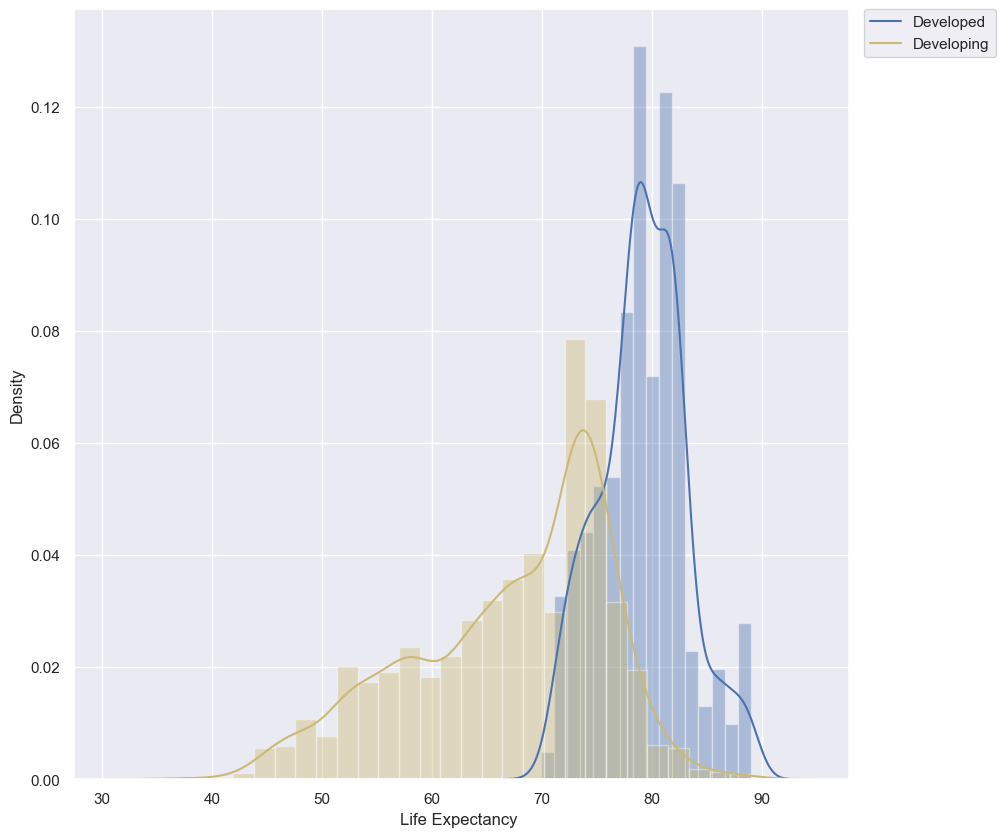

ShapiroResult(statistic=0.9563312530517578, pvalue=8.011480975249593e-29)


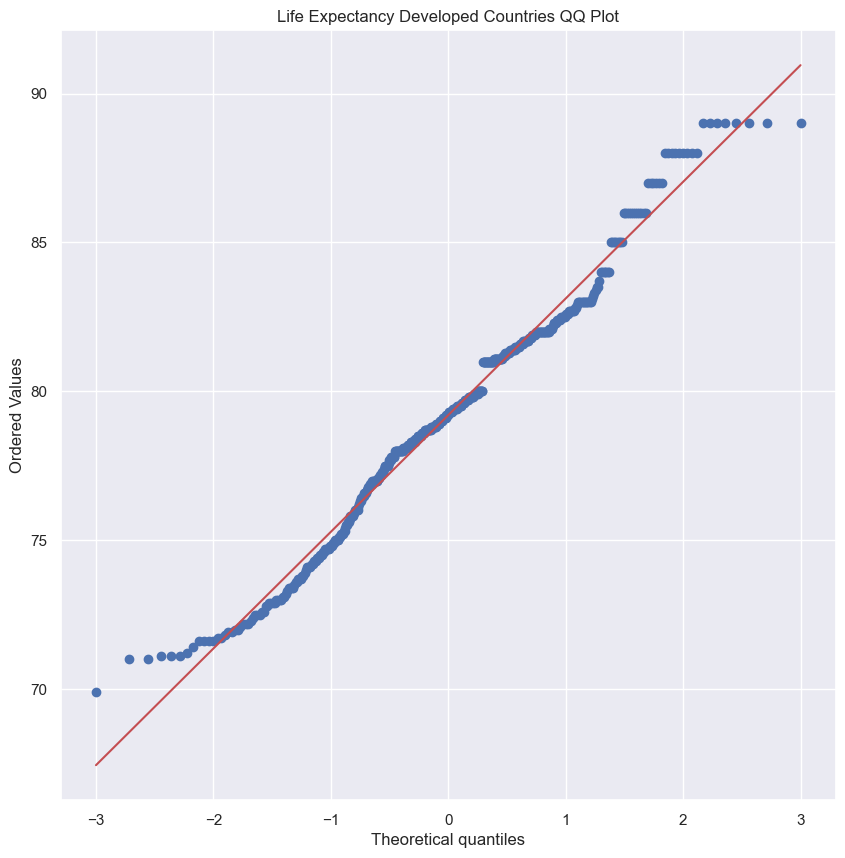

ShapiroResult(statistic=0.9563312530517578, pvalue=8.011480975249593e-29)


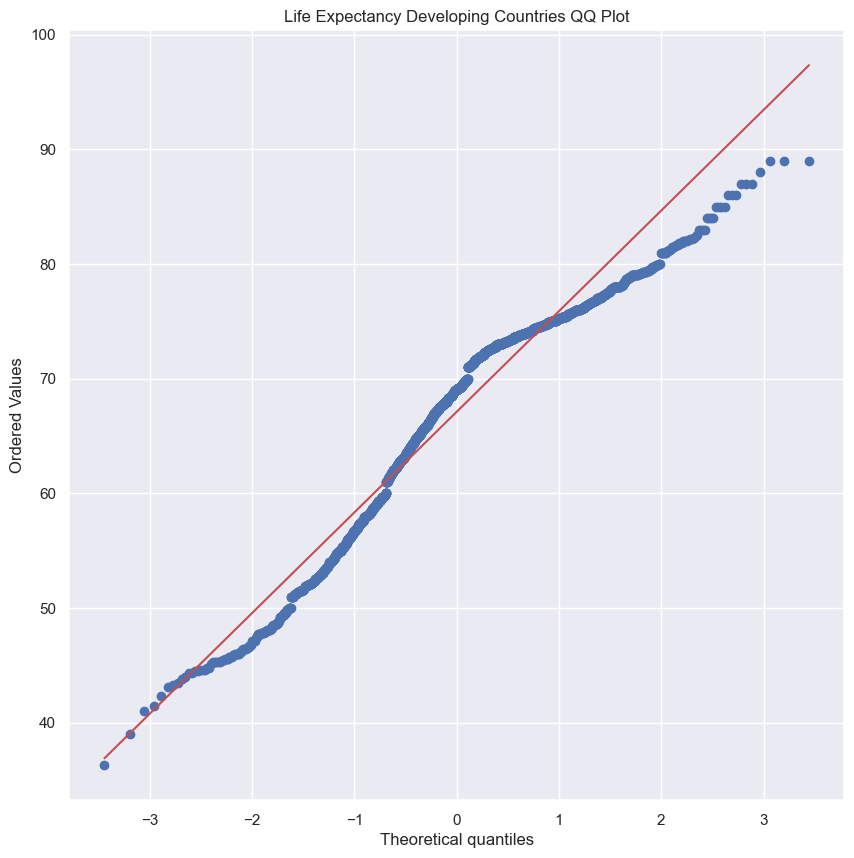

count       mean       std   min   25%    50%   75%   max
Status                                                                
Developed    512.0  79.197852  3.930942  69.9  76.8  79.25  81.7  89.0
Developing  2426.0  67.120177  8.988524  36.3  61.1  69.05  74.0  89.0

In [28]:
#Life Expectancy 
sns.distplot(life_expectancy_data[life_expectancy_data['Status']=='Developed']['Life Expectancy '])
sns.distplot(life_expectancy_data[life_expectancy_data['Status']=='Developing']['Life Expectancy '],color='y')
labels=['Developed','Developing']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(life_expectancy_data[life_expectancy_data['Status']=='Developed']['Life Expectancy '], dist="norm", plot=plt)
plt.title('Life Expectancy Developed Countries QQ Plot')
print(stats.shapiro(life_expectancy_data['Life Expectancy ']))
plt.show()
#QQ plot   
stats.probplot(life_expectancy_data[life_expectancy_data['Status']=='Developing']['Life Expectancy '], dist="norm", plot=plt)
plt.title('Life Expectancy Developing Countries QQ Plot')
print(stats.shapiro(life_expectancy_data['Life Expectancy ']))
plt.show()

life_expectancy_data['Life Expectancy '].groupby(life_expectancy_data['Status']).describe()

In [197]:
bins=[36,60,78,90]
labels=[3,2,1]
life_expectancy_data['world']=pd.cut(life_expectancy_data['Life Expectancy '],bins=bins,labels=labels)

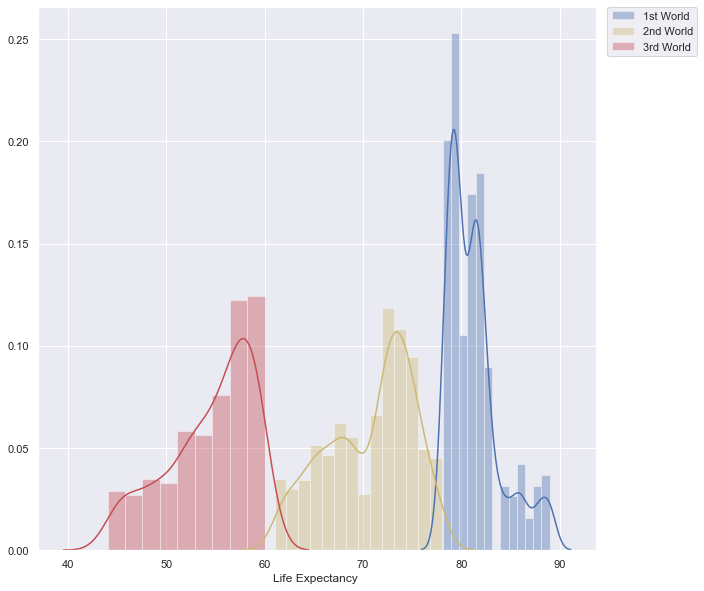

(0.9639620780944824, 7.816321706167366e-20)


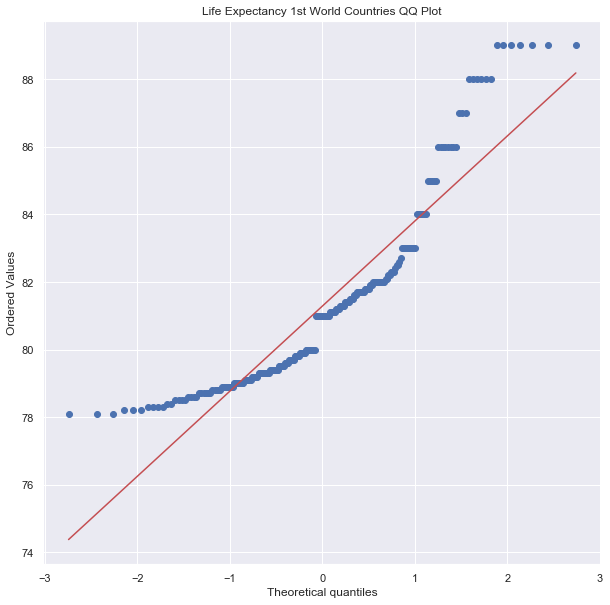

(0.9639620780944824, 7.816321706167366e-20)


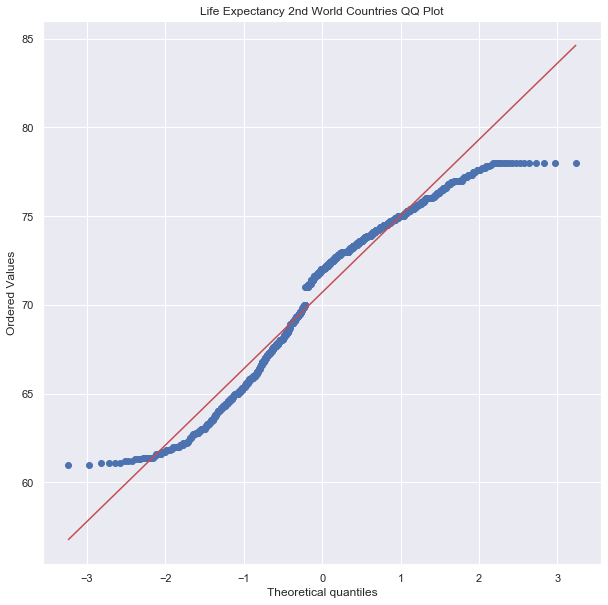

(0.9639620780944824, 7.816321706167366e-20)


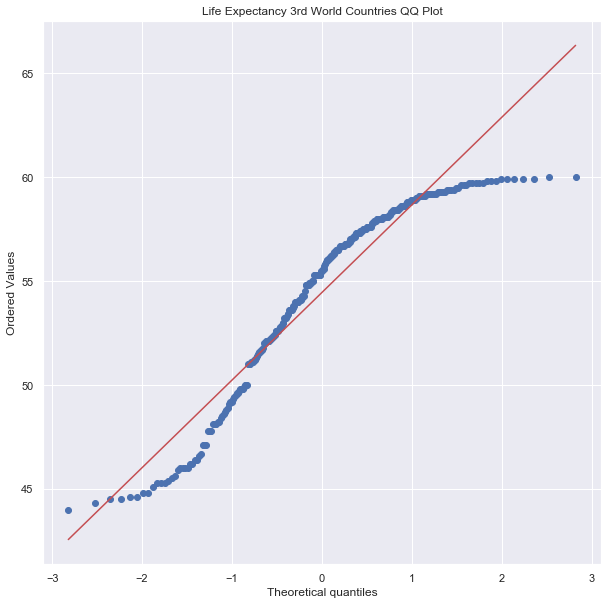

count       mean       std   min   25%   50%   75%   max
world                                                           
3       289.0  54.450865  4.372468  44.0  51.7  55.5  58.0  60.0
2      1134.0  70.700088  4.407351  61.0  67.3  72.0  74.1  78.0
1       226.0  81.280088  2.693515  78.1  79.3  81.0  82.0  89.0

In [198]:
#Life Expectancy 
sns.distplot(life_expectancy_data[life_expectancy_data['world']==1]['Life Expectancy '])
sns.distplot(life_expectancy_data[life_expectancy_data['world']==2]['Life Expectancy '],color='y')
sns.distplot(life_expectancy_data[life_expectancy_data['world']==3]['Life Expectancy '],color='r')

labels=['1st World','2nd World','3rd World']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(life_expectancy_data[life_expectancy_data['world']==1]['Life Expectancy '], dist="norm", plot=plt)
plt.title('Life Expectancy 1st World Countries QQ Plot')
print(stats.shapiro(life_expectancy_data['Life Expectancy ']))
plt.show()
#QQ plot   
stats.probplot(life_expectancy_data[life_expectancy_data['world']==2]['Life Expectancy '], dist="norm", plot=plt)
plt.title('Life Expectancy 2nd World Countries QQ Plot')
print(stats.shapiro(life_expectancy_data['Life Expectancy ']))
plt.show()

stats.probplot(life_expectancy_data[life_expectancy_data['world']==3]['Life Expectancy '], dist="norm", plot=plt)
plt.title('Life Expectancy 3rd World Countries QQ Plot')
print(stats.shapiro(life_expectancy_data['Life Expectancy ']))
plt.show()

life_expectancy_data['Life Expectancy '].groupby(life_expectancy_data['world']).describe()

The cut off boundary age between developing and developed is 69.9. The countries will be further categorized into 3 catergories 1st, 2nd and 3rd world countries. 1st world countries are considered over 69.9 while 2nd world countries are over 60. The QQ plots broken up by status show better normality versus the overall histogram.

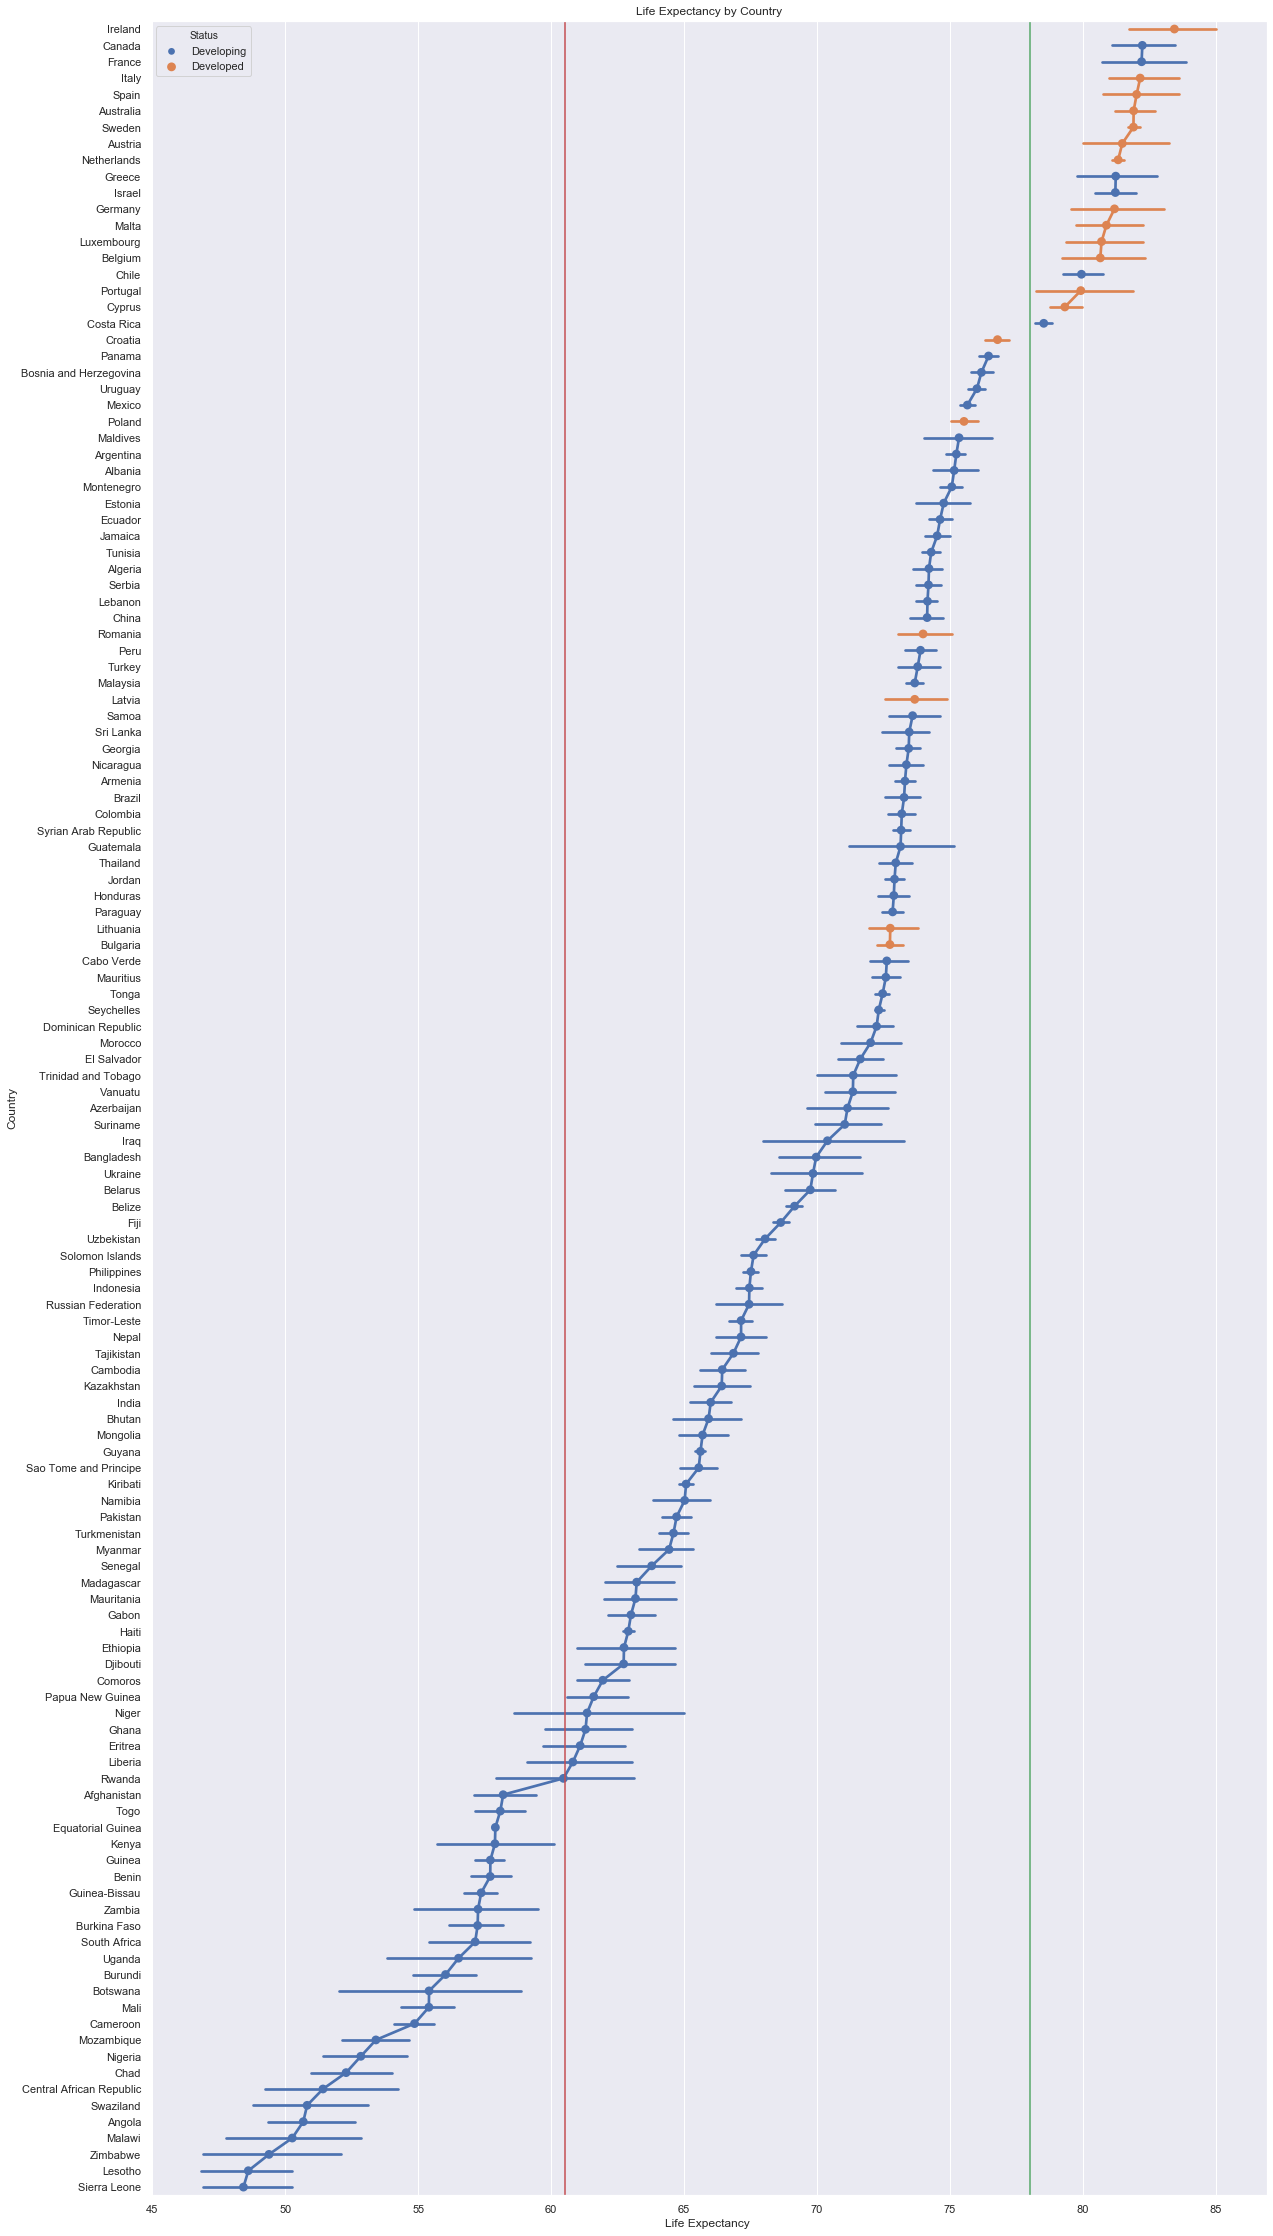

In [200]:
LEcountry=life_expectancy_data.groupby(life_expectancy_data['Country'])['Life Expectancy '].mean().sort_values(kind="quicksort",ascending=False)
sns.pointplot(y='Country',x='Life Expectancy ',hue='Status',data=life_expectancy_data,order=LEcountry.index,join=True)
plt.title( 'Life Expectancy by Country')
plt.axvline(78,0,10,color='g')
plt.axvline(life_expectancy_data['Life Expectancy '].mean()-life_expectancy_data['Life Expectancy '].std(),0,10,color='r')
sns.set(rc={'figure.figsize':(20,40)})
plt.show()

Developed or Developing Country Status
Developing    0.853244
Developed     0.146756
Name: Status, dtype: float64


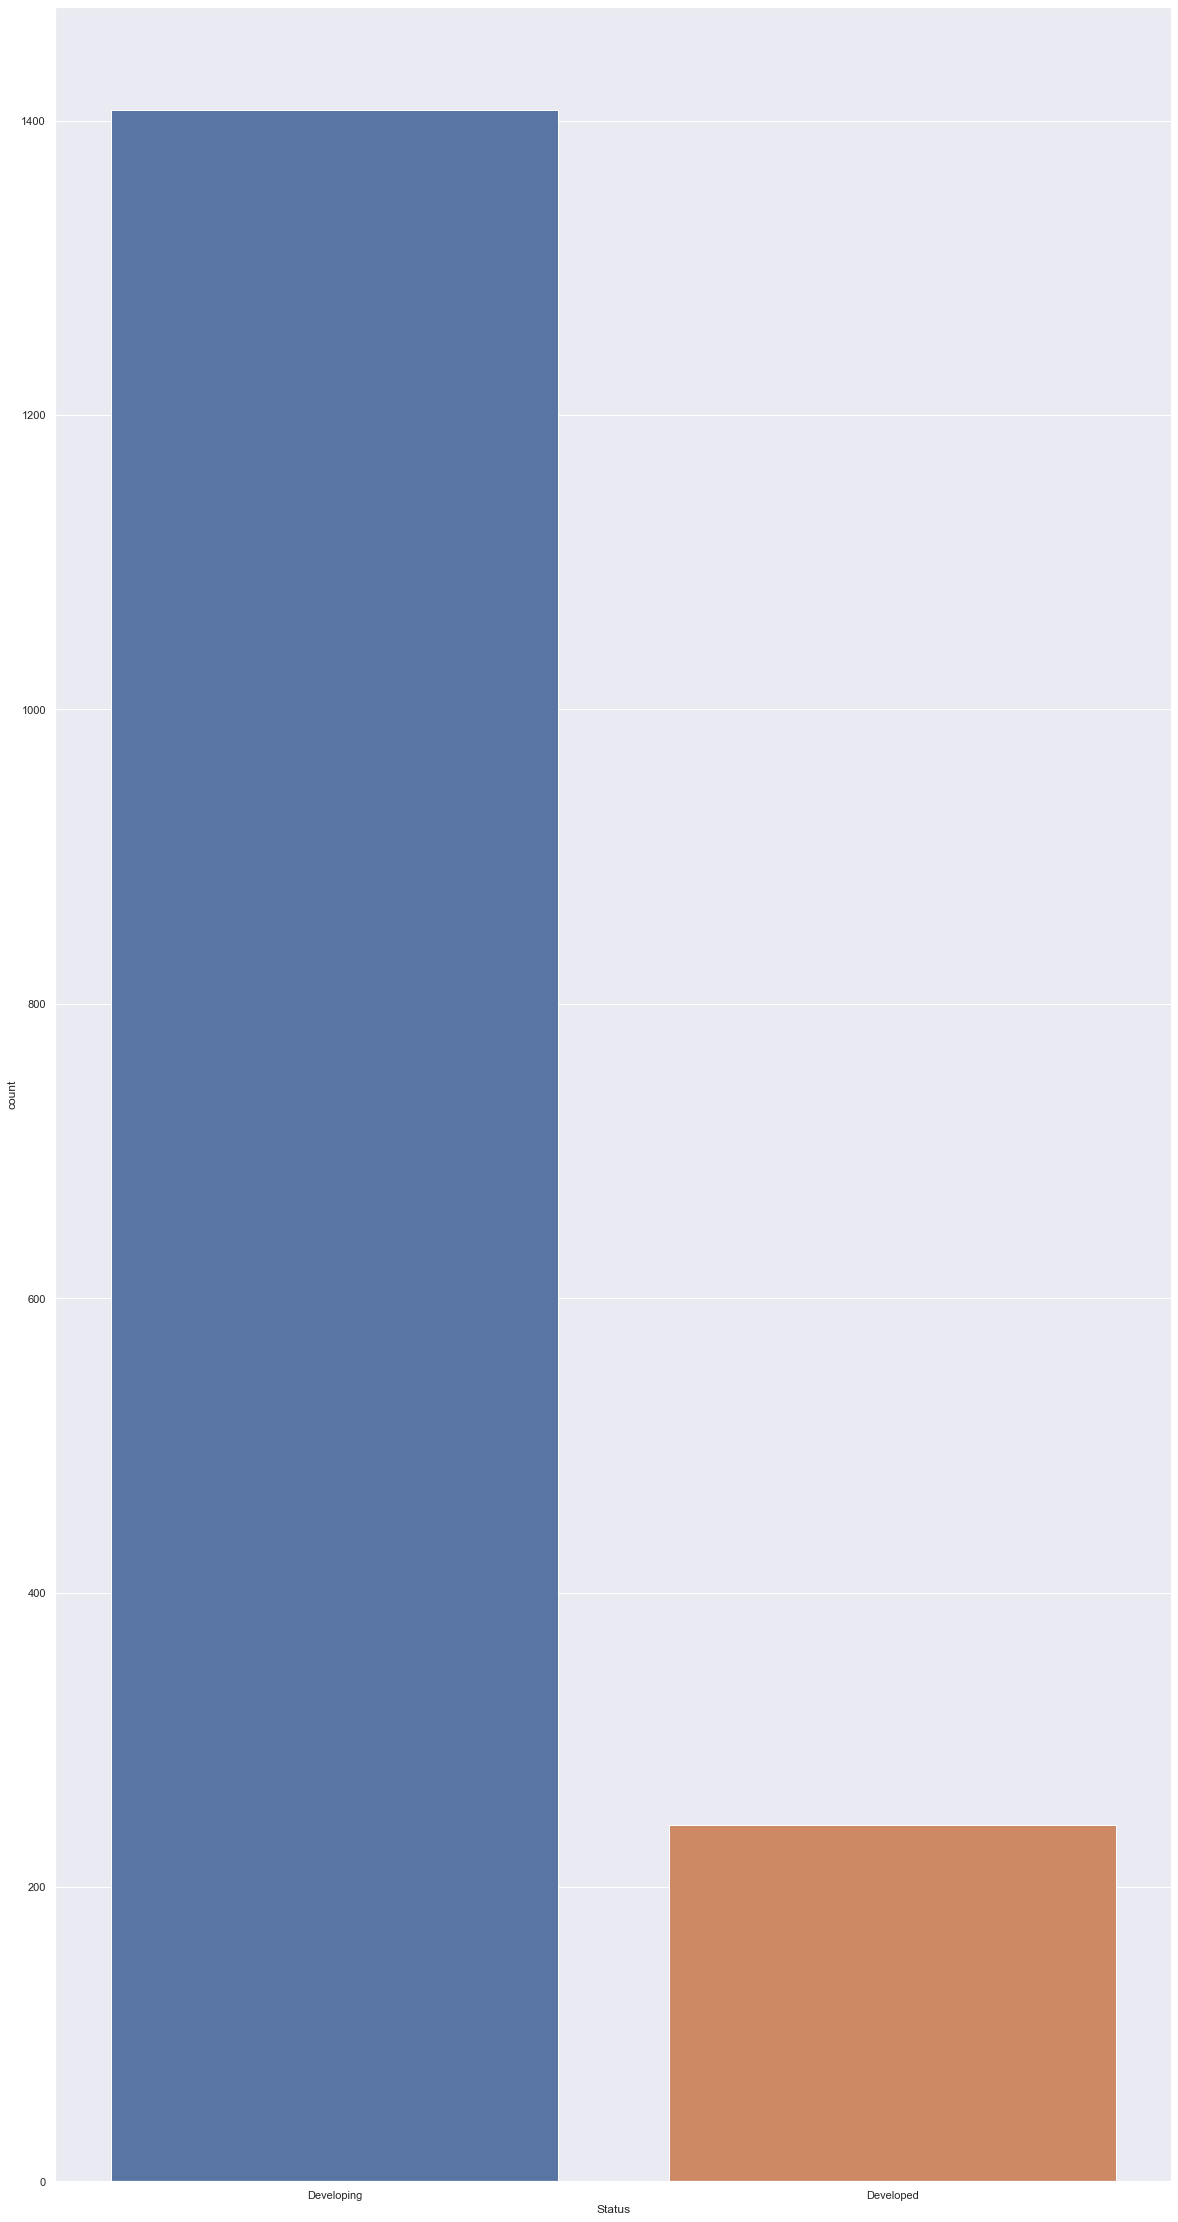

1st,2nd,and 3rd World Countries
2    133.0
3     34.0
1     26.0
Name: world, dtype: float64


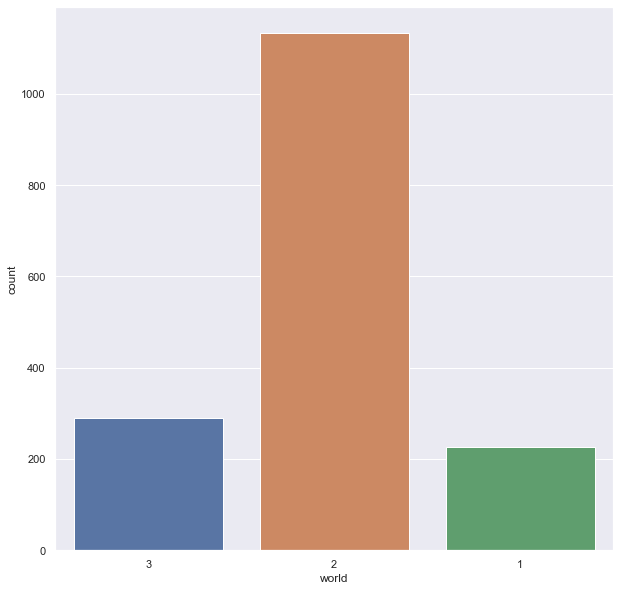

In [202]:
sns.countplot(life_expectancy_data['Status'])
print('Developed or Developing Country Status')
print(life_expectancy_data.Status.value_counts()/len(life_expectancy_data.Status))
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

sns.countplot(life_expectancy_data['world'])
print('1st,2nd,and 3rd World Countries')
print(((life_expectancy_data.world.value_counts()/len(life_expectancy_data.world))*193).round(0))
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

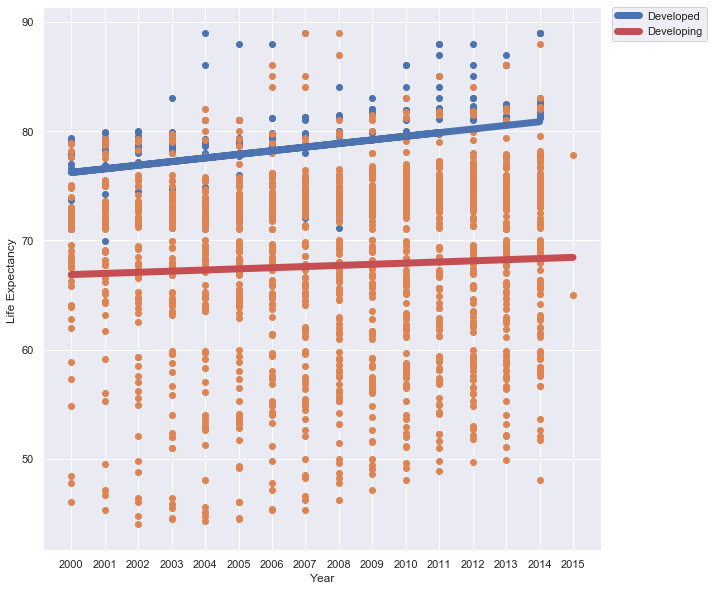

In [203]:
def LEfactorplot(column):
    x=life_expectancy_data[life_expectancy_data['Status']=='Developed'][column]
    y=life_expectancy_data[life_expectancy_data['Status']=='Developed']['Life Expectancy ']
    x1=life_expectancy_data[life_expectancy_data['Status']=='Developing'][column]
    y1=life_expectancy_data[life_expectancy_data['Status']=='Developing']['Life Expectancy ']
    #Fit Lines
    z1 =np.polyfit(x,y,1)
    z2 =np.polyfit(x1,y1,1)
    z1poly = np.poly1d(z1) 
    z2poly = np.poly1d(z2)

    #Plot
    plt.scatter(x,y,alpha=1)
    plt.scatter(x1,y1,alpha=1)
    plt.plot(x,z1poly(x),linewidth=7.0)
    plt.plot(x1,z2poly(x1),linewidth=7.0,color='r')
    labels=['Developed','Developing']
    plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Life Expectancy ')
    plt.xlabel(column)
LEfactorplot('Year')
plt.xticks(np.arange(2000,2016,1))
plt.show()

Correlation Values for the 133 countries left after Data Cleaning:


Life Expectancy   BMI                    0.542042
                  GDP                    0.441322
                  Percent Expenditure    0.409631
                  Alcohol                0.402718
                  Diphtheria             0.341331
                  Polio                  0.327294
                  Hep B                  0.199935
                  Total Expenditure      0.174718
Year              Income Composition     0.122892
                  Schooling              0.088732
Life Expectancy   Year                   0.050771
                  Population            -0.022305
                  Measles               -0.068881
                  Infant Deaths         -0.169074
                  U-5 Deaths            -0.192265
                  HIVAIDS               -0.592236
                  Adult Mortality       -0.702523
dtype: float64

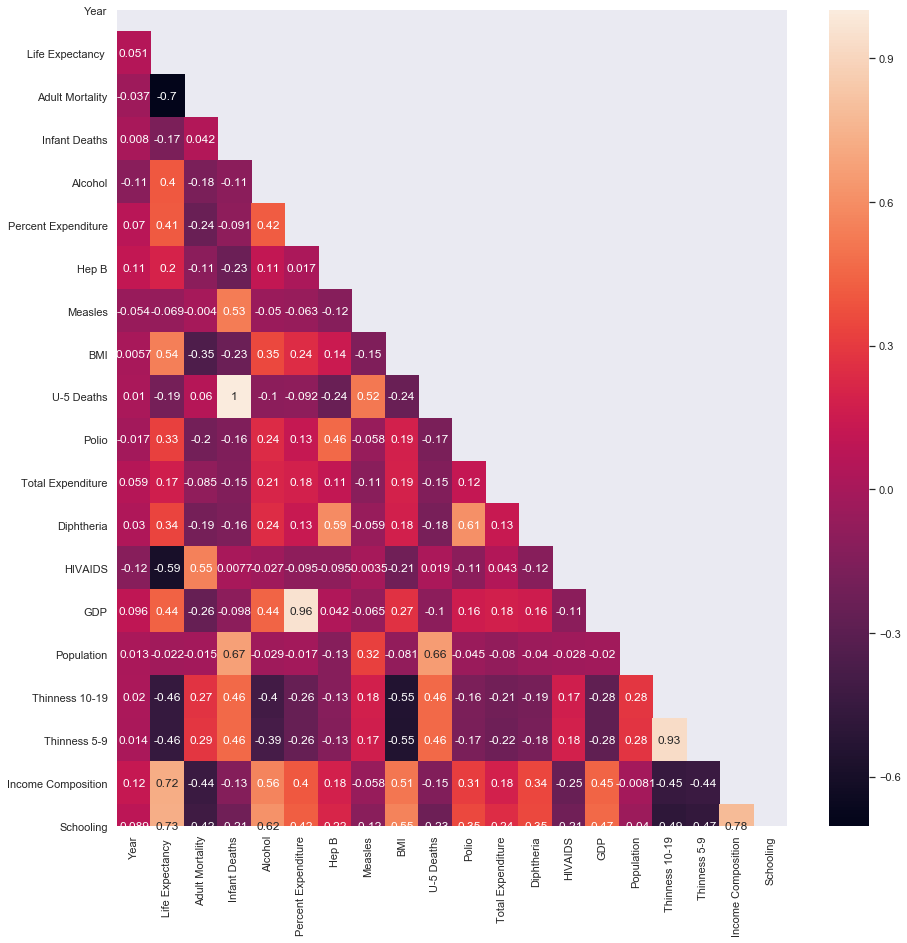

In [204]:
corrmat = life_expectancy_data.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(life_expectancy_data[top_corr_features].corr(),annot=True,mask=mask)
sol = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
                 .stack().sort_values(kind="quicksort",ascending=False))
LE=pd.Series(corrmat.unstack()[18:36]).sort_values(kind="quicksort",ascending=False)
print('Correlation Values for the {} countries left after Data Cleaning:'.format(len(life_expectancy_data['Country'].unique())))
LE[1:18]

In [205]:
print('Top 10 Correlated Features Pairs:')
print(sol[0:10],'\n')
print('Bottom 10 Correlated Features Pairs:')
print(sol[143:153])

Top 10 Correlated Features Pairs:
Infant Deaths        U-5 Deaths            0.996906
Percent Expenditure  GDP                   0.959299
Thinness 10-19       Thinness 5-9          0.927913
Income Composition   Schooling             0.784741
Life Expectancy      Schooling             0.727630
                     Income Composition    0.721083
Infant Deaths        Population            0.671758
U-5 Deaths           Population            0.658680
Alcohol              Schooling             0.616975
Polio                Diphtheria            0.609245
dtype: float64 

Bottom 10 Correlated Features Pairs:
U-5 Deaths        Income Composition   -0.148097
Measles           BMI                  -0.153245
Infant Deaths     Polio                -0.156929
                  Diphtheria           -0.161871
Polio             Thinness 10-19       -0.164070
Life Expectancy   Infant Deaths        -0.169074
U-5 Deaths        Polio                -0.171164
Polio             Thinness 5-9         -0.174489


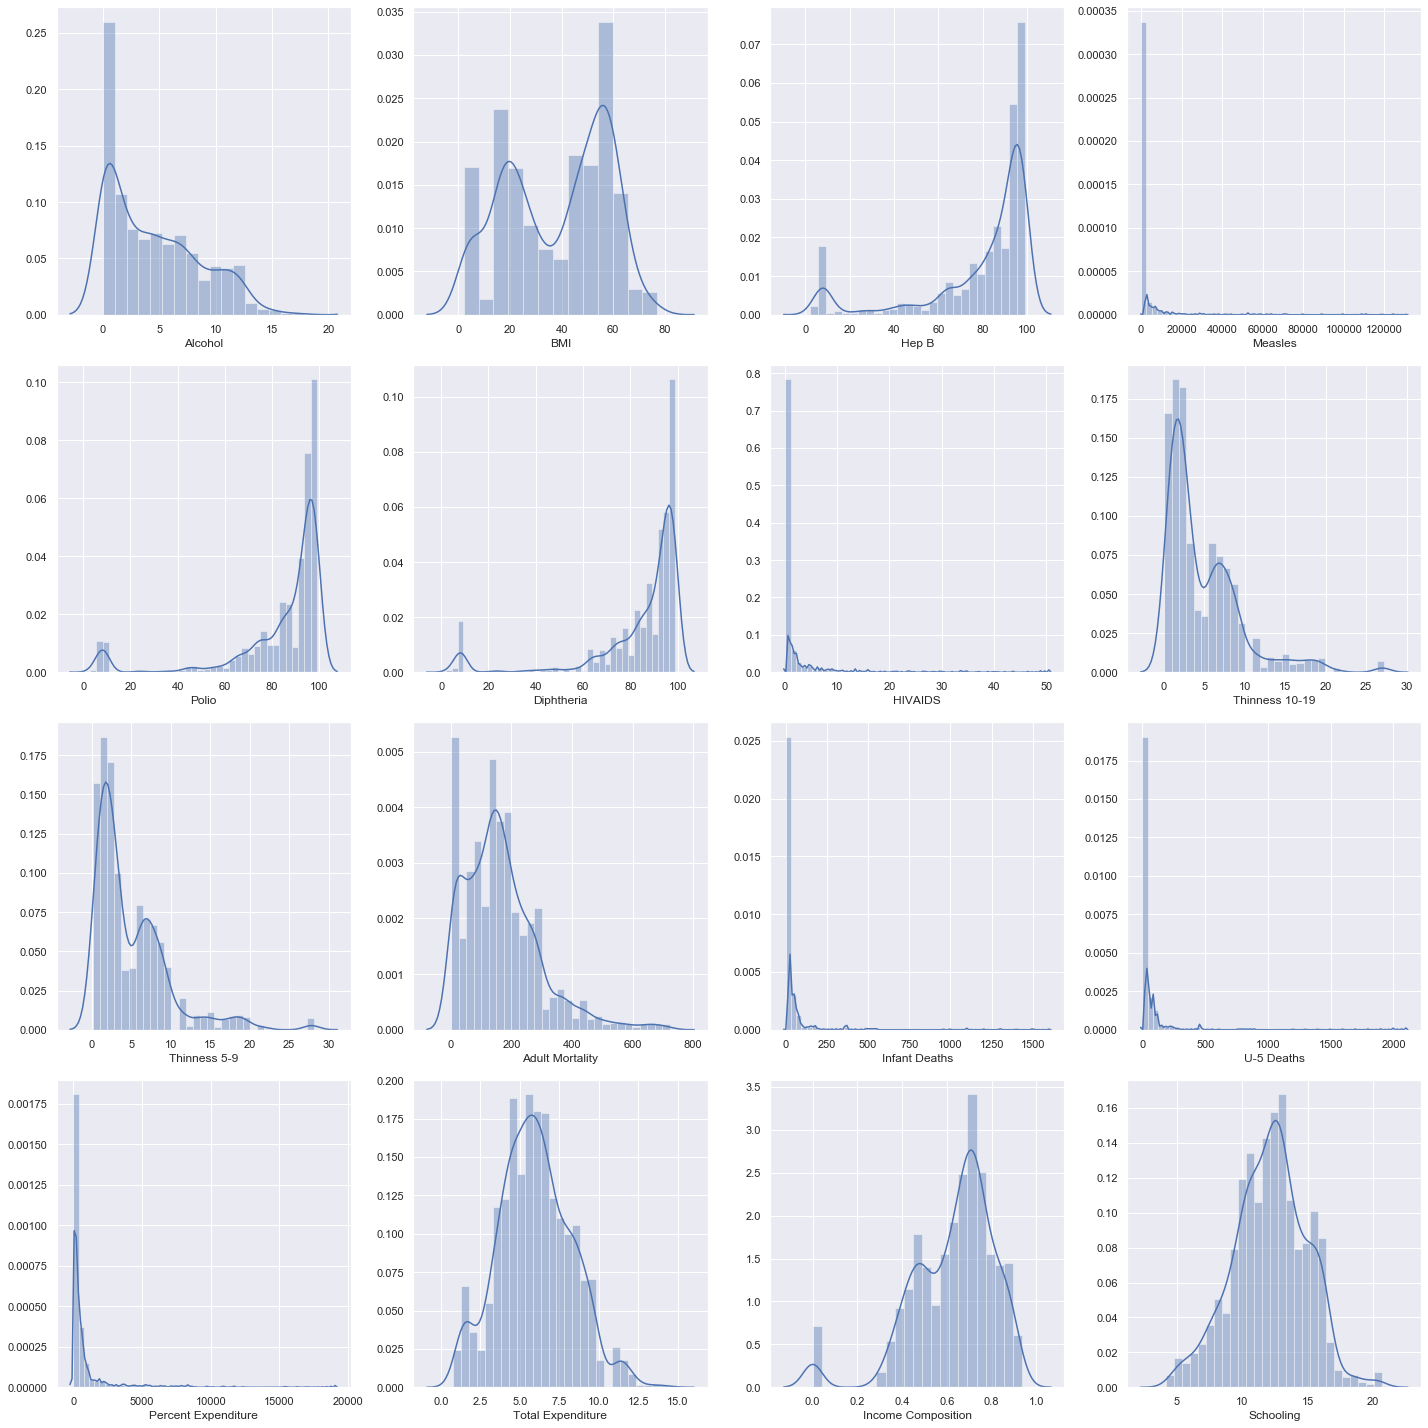

In [207]:
columns=['Alcohol','BMI','Hep B','Measles','Polio','Diphtheria','HIVAIDS','Thinness 10-19',
         'Thinness 5-9','Adult Mortality','Infant Deaths','U-5 Deaths','Percent Expenditure'
         ,'Total Expenditure','Income Composition','Schooling']

for column,i in zip(columns,range(len(columns))):
    plt.subplot(4,4,i+1)
    sns.distplot(life_expectancy_data[column])  
    plt.tight_layout()
    sns.set(rc={'figure.figsize':(20,20)})

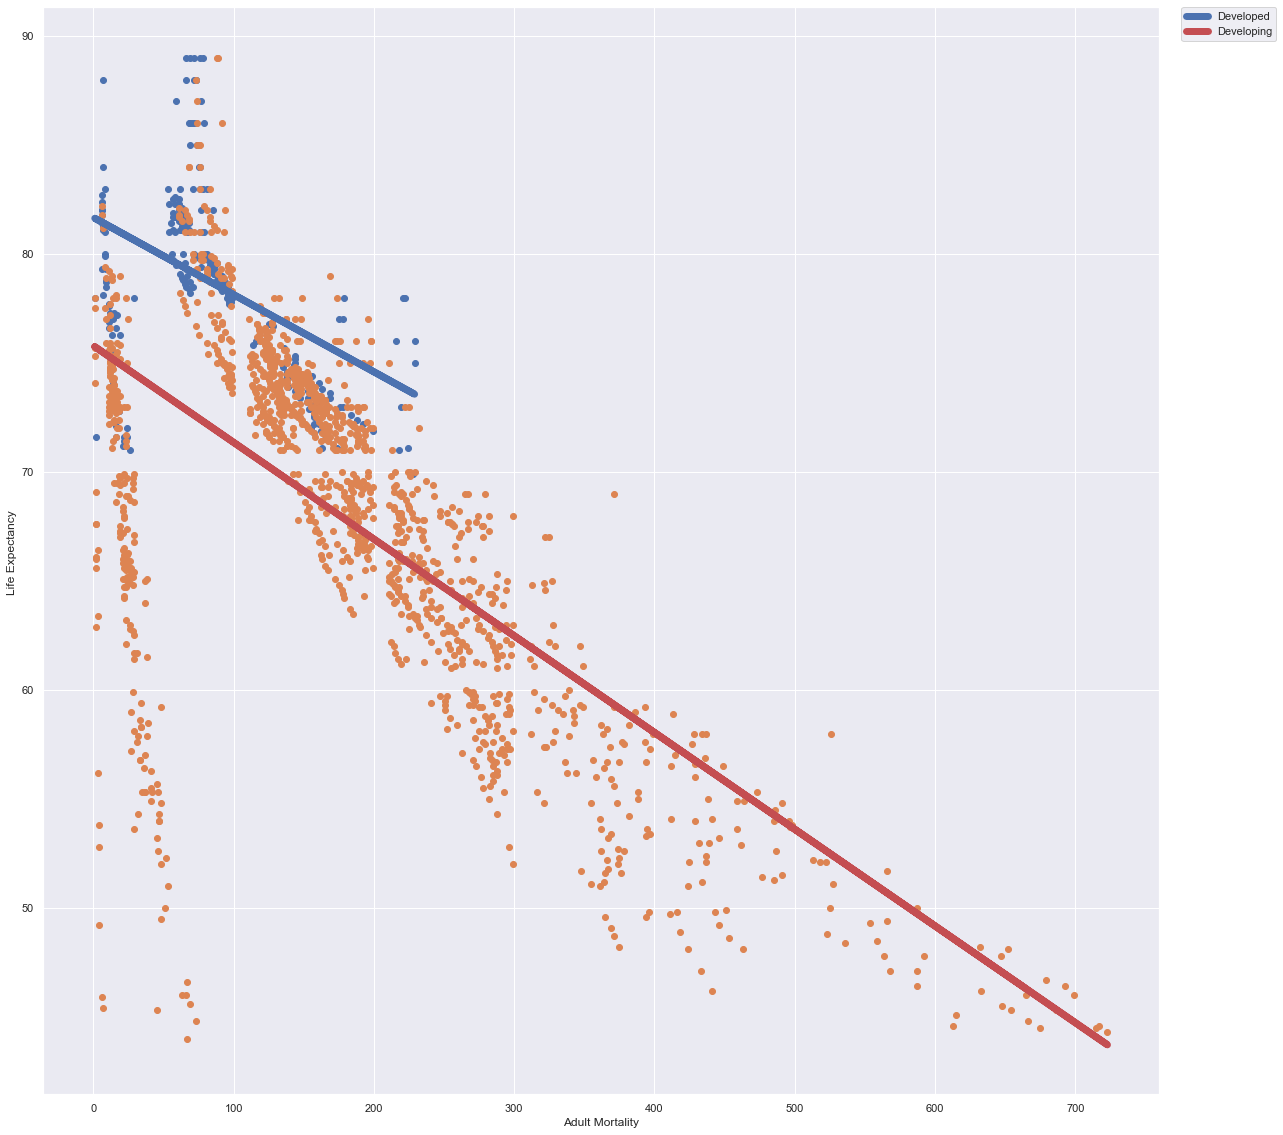

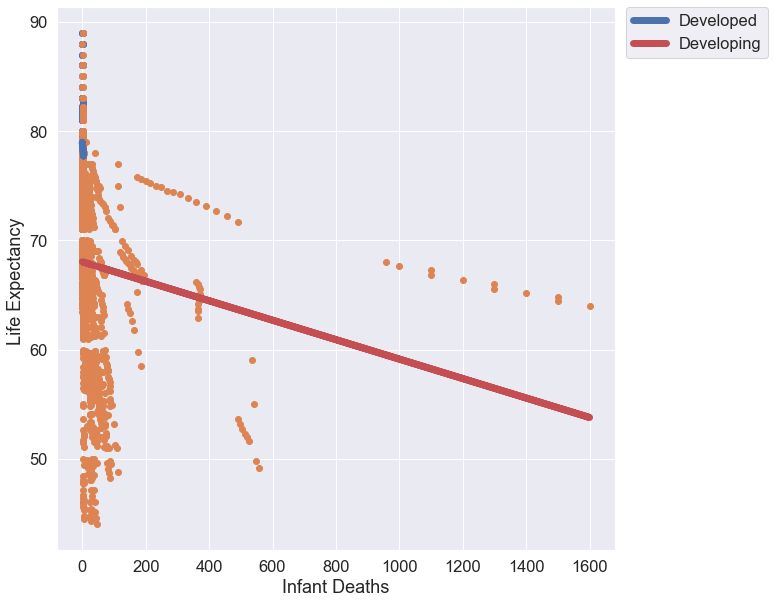

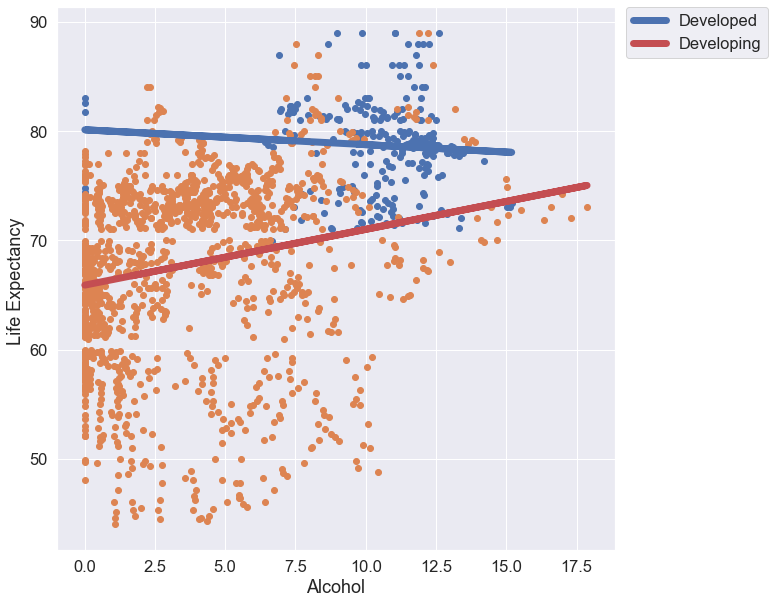

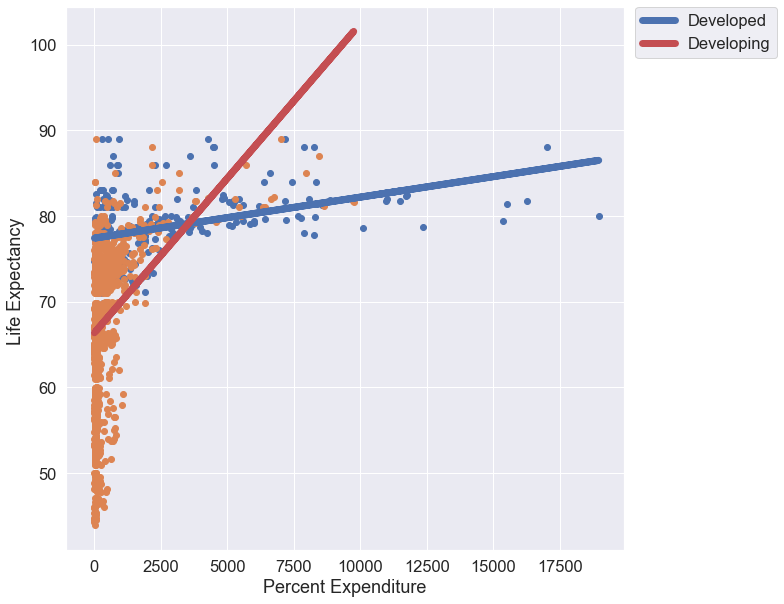

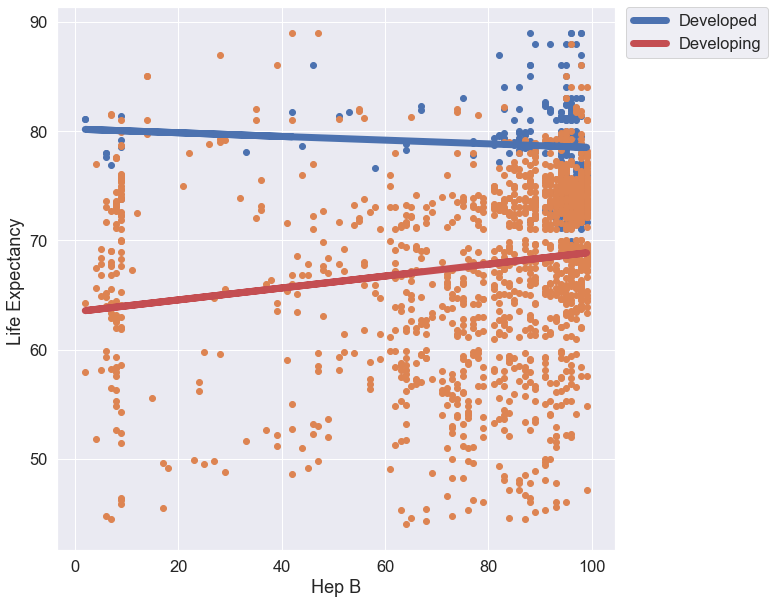

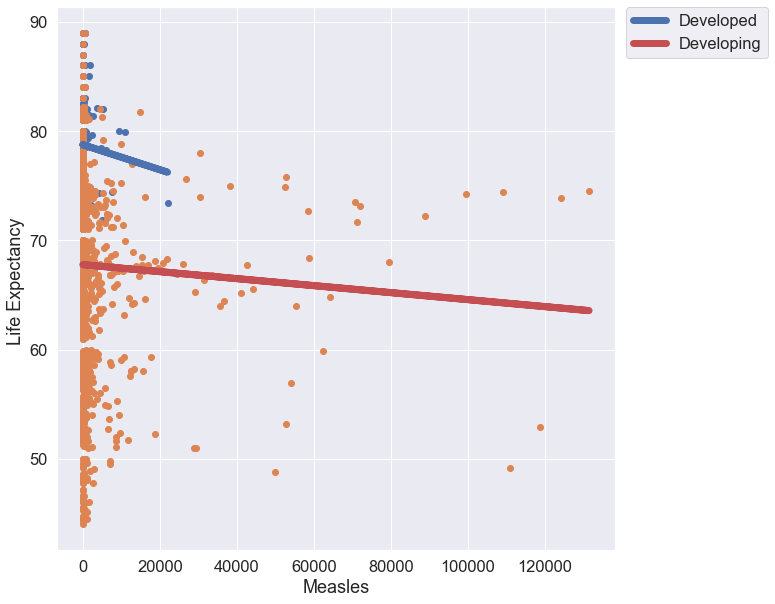

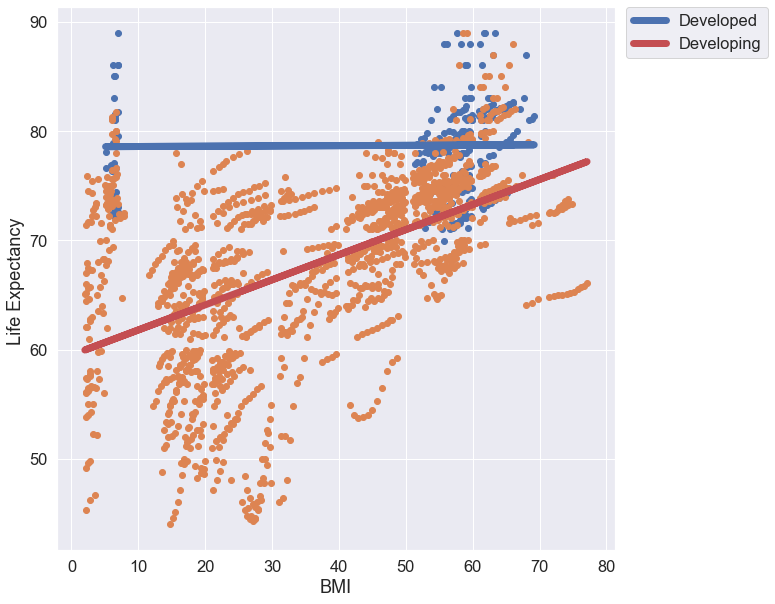

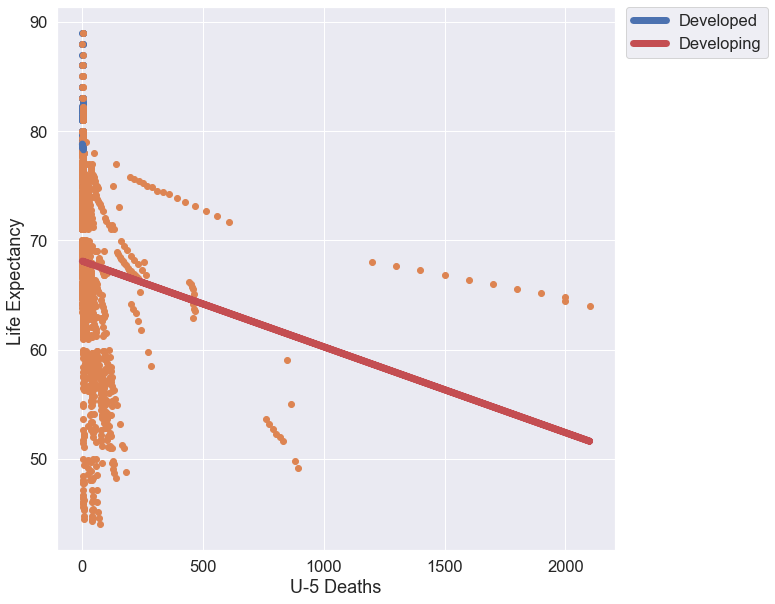

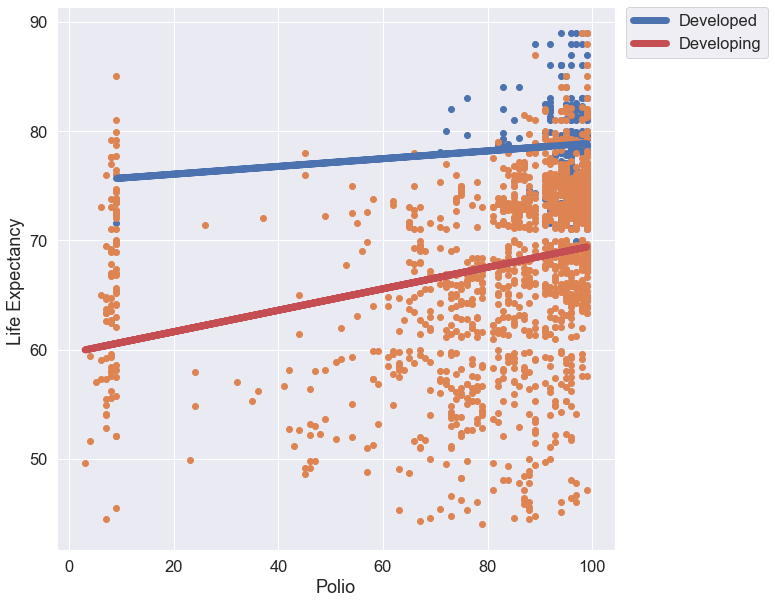

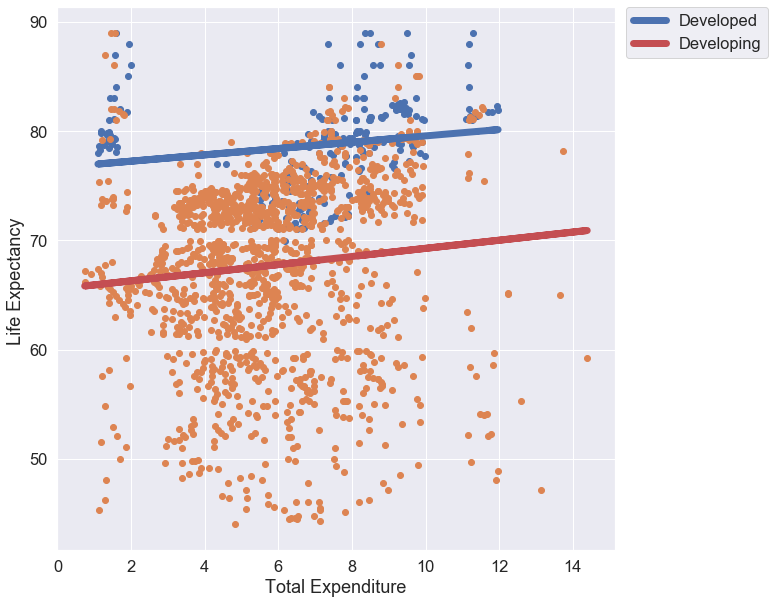

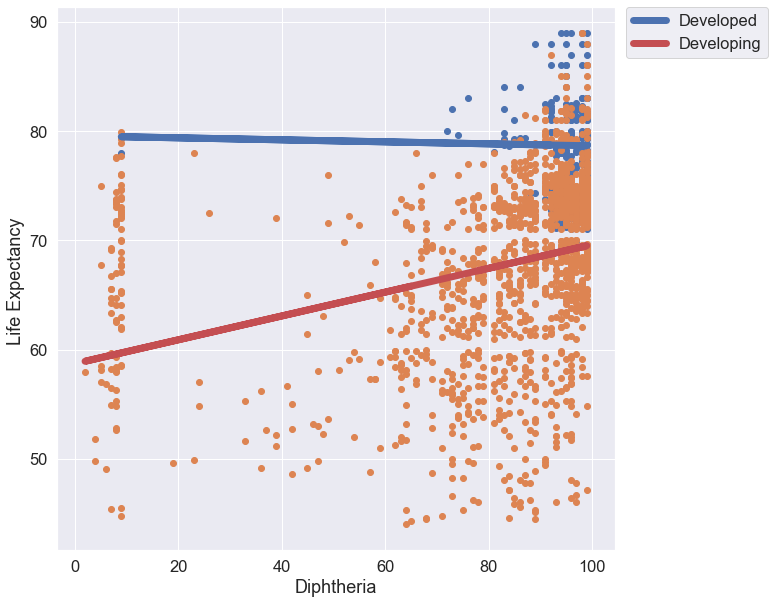

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



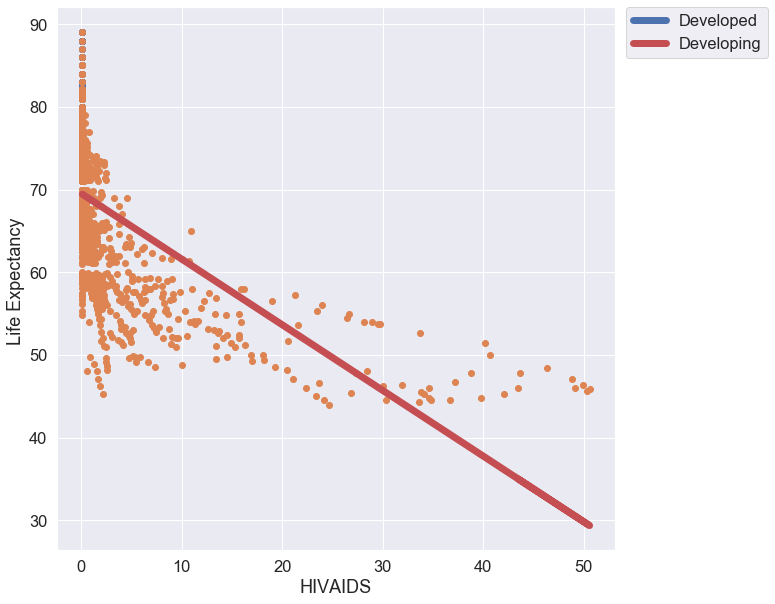

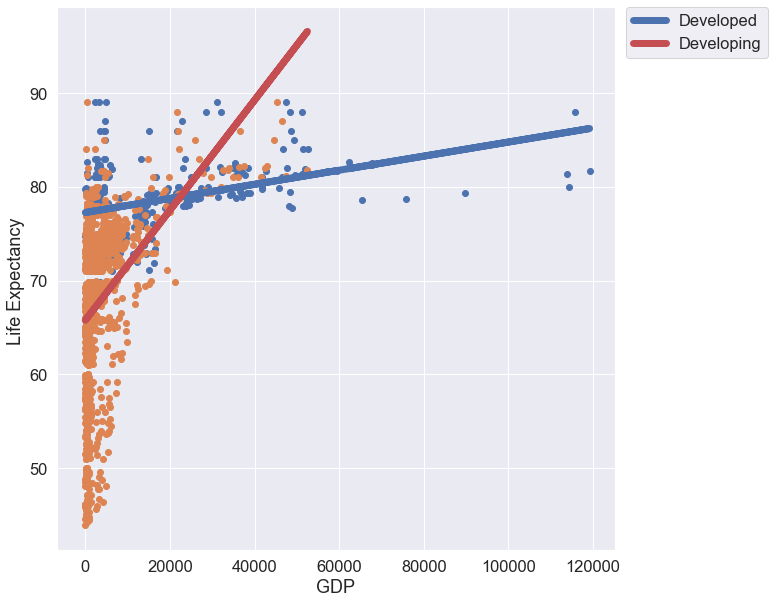

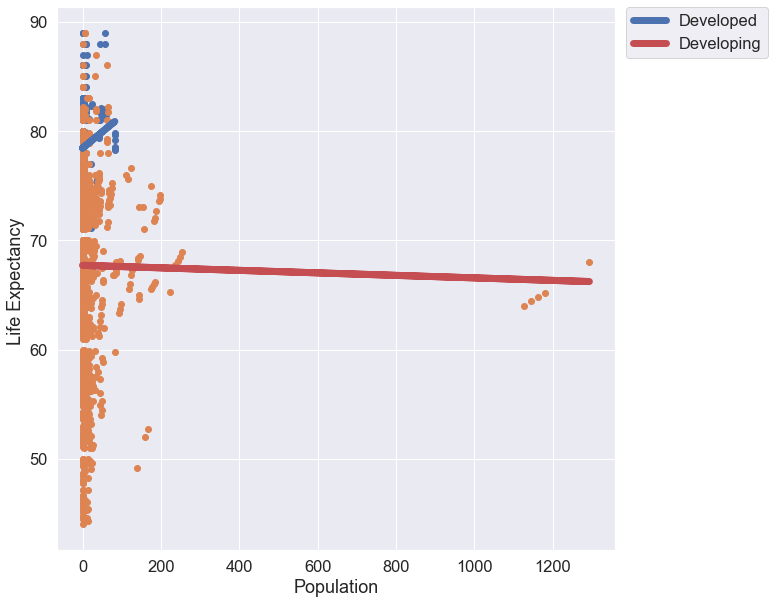

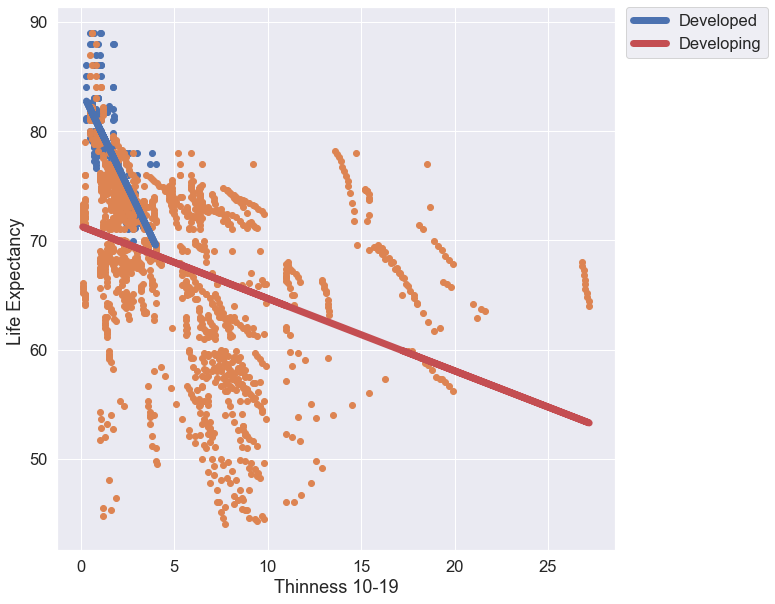

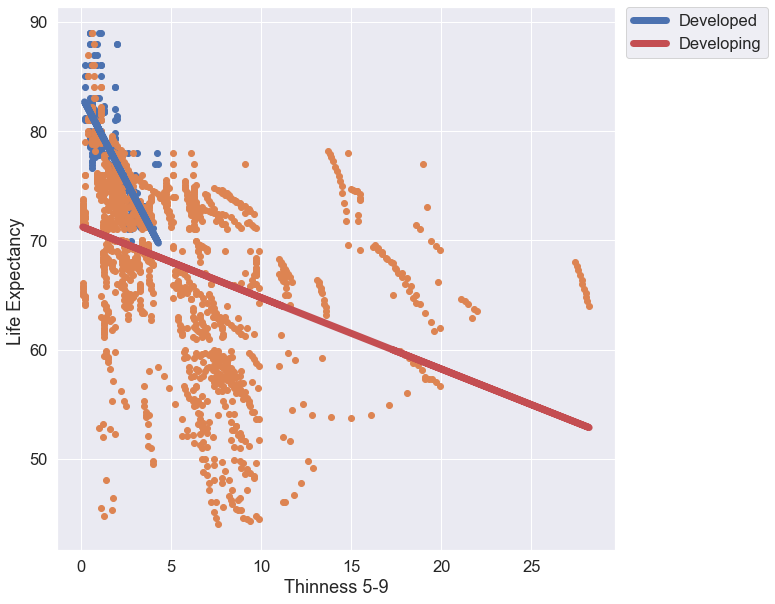

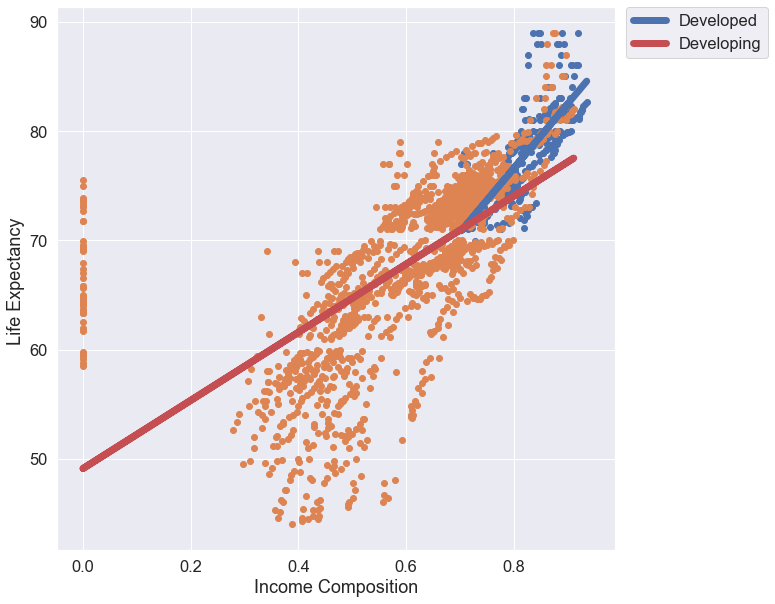

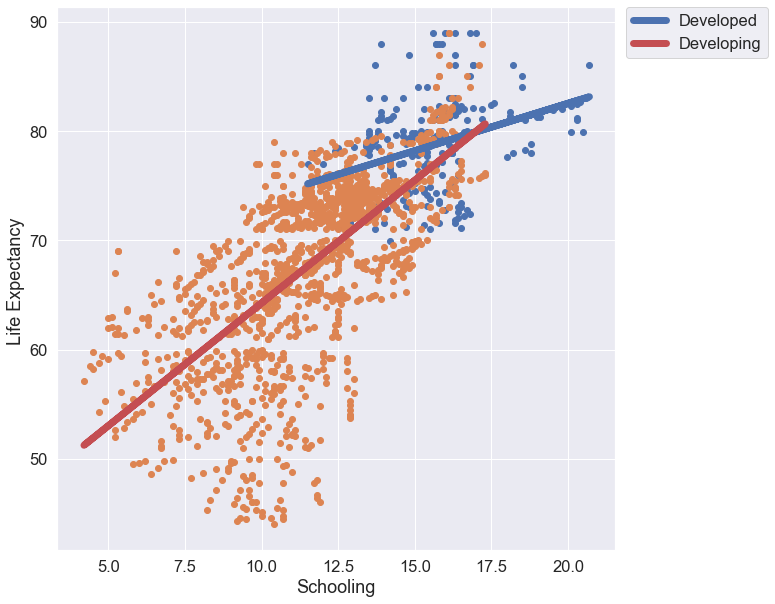

In [208]:
for column in life_expectancy_data.columns:
    if (column=='Country')or(column=='Status')or(column=='Life Expectancy ')or(column=='world')or(column=='Year'):
        pass
    else:
        LEfactorplot(column)
        sns.set(rc={'figure.figsize':(10,10)})
        sns.set(font_scale=1.5)
        plt.show()

# How has the median life expectancy for all countries changed over time?

In [97]:
data = life_expectancy_data.groupby('Year').median()

In [98]:
data

Life expectancy   Adult Mortality  infant deaths   Alcohol  \
Year                                                               
2000              71.0            155.0              4  3.610000   
2001              71.2            151.0              4  3.810000   
2002              71.4            146.0              3  3.760000   
2003              71.1            144.0              3  4.040000   
2004              71.2            158.0              3  3.810000   
2005              71.6            138.0              3  4.140000   
2006              72.1            144.0              3  4.070000   
2007              72.4            136.0              3  4.130000   
2008              72.4            157.0              3  4.210000   
2009              72.6            147.0              3  4.070000   
2010              72.8            142.0              3  4.230000   
2011              73.3            139.0              3  4.090000   
2012              73.2            138.0              3  2.980000   
2013              72.8            141.0              2  2.420000   
2014              73.6            135.0              2  0.380000   
2015              73.9            138.0              2  4.602861   

      percentage expenditure  Hepatitis B  Measles    BMI   \
Year                                                         
2000               35.661251    80.940461        47   37.9   
2001               46.830275    80.940461        49   39.6   
2002               49.735114    80.940461        36   42.0   
2003               55.595439    80.940461        44   41.2   
2004               55.361072    81.000000        22   41.3   
2005               79.415027    87.000000         7   39.6   
2006               76.198689    88.000000        15   43.0   
2007               74.821749    89.000000         8   42.0   
2008               93.367890    89.000000         4   43.2   
2009              115.069242    92.000000         6   45.6   
2010              129.226075    91.000000        17   44.2   
2011              158.277080    92.000000        27   45.1   
2012              196.915250    93.000000        11   45.7   
2013               97.522115    93.000000         6   47.2   
2014              151.104555    92.000000        13   47.0   
2015                0.000000    92.000000        17   48.6   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
Year                                                                         
2000                   5   88.0            5.50000         85.0        0.1   
2001                   4   89.0            5.47000         89.0        0.1   
2002                   4   91.0            5.52000         88.0        0.1   
2003                   4   91.0            5.61000         91.0        0.1   
2004                   4   91.0            5.70000         89.0        0.1   
2005                   4   93.0            5.82000         93.0        0.1   
2006                   4   94.0            5.70000         92.0        0.1   
2007                   4   93.0            5.64000         93.0        0.1   
2008                   4   93.0            5.76000         93.0        0.1   
2009                   3   93.0            6.39000         93.0        0.1   
2010                   3   94.0            5.86000         93.0        0.1   
2011                   3   94.0            5.80000         94.0        0.1   
2012                   3   94.0            6.12000         94.0        0.1   
2013                   3   94.0            5.96000         94.0        0.1   
2014                   3   94.0            5.88000         94.0        0.1   
2015                   3   93.0            5.93819         93.0        0.1   

              GDP  Population   thinness  1-19 years   thinness 5-9 years  \
Year                                                                        
2000  1451.297760  2884522.00                    3.4                  3.4   
2001  1654.967610  3497124.0

# What are the current life expectancies for each country?

In [99]:
life_expectancy_data.copy()

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [100]:
df_2 = life_expectancy_data.copy()
df_2 = df_2[life_expectancy_data.Year == life_expectancy_data.Year.max()]
df_2.sort_values('Life expectancy ', ascending=False, inplace=True)
df_2

Country  Year      Status  Life expectancy   \
2345                  Slovenia  2015   Developed              88.0   
737                    Denmark  2015   Developed              86.0   
673                     Cyprus  2015   Developed              85.0   
544                      Chile  2015  Developing              85.0   
1314                     Japan  2015   Developed              83.7   
...                        ...   ...         ...               ...   
432              Côte d'Ivoire  2015  Developing              53.3   
528                       Chad  2015  Developing              53.1   
512   Central African Republic  2015  Developing              52.5   
48                      Angola  2015  Developing              52.4   
2297              Sierra Leone  2015  Developing              51.0   

      Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
2345             74.0              0  4.602861                     0.0   
737              71.0              0  4.602861                     0.0   
673              52.0              0  4.602861                     0.0   
544              82.0              2  4.602861                     0.0   
1314             55.0              2  4.602861                     0.0   
...               ...            ...       ...                     ...   
432             397.0             57  4.602861                     0.0   
528             356.0             46  4.602861                     0.0   
512             397.0             15  4.602861                     0.0   
48              335.0             66  4.602861                     0.0   
2297            413.0             22  4.602861                     0.0   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
2345    80.940461        18  ...   95.0            5.93819         95.0   
737     80.940461         9  ...   93.0            5.93819         93.0   
673     97.000000         0  ...   97.0            5.93819         97.0   
544     97.000000         9  ...   96.0            5.93819         96.0   
1314    80.940461        35  ...   99.0            5.93819         96.0   
...           ...       ...  ...    ...                ...          ...   
432     83.000000        65  ...   81.0            5.93819         83.0   
528     46.000000       418  ...   52.0            5.93819         46.0   
512     47.000000       150  ...   47.0            5.93819         47.0   
48      64.000000       118  ...    7.0            5.93819         64.0   
2297    86.000000       607  ...   86.0            5.93819         86.0   

       HIV/AIDS           GDP    Population   thinness  1-19 years  \
2345        0.1   2729.863830  2.635310e+05                    1.4   
737         0.1   5314.644160  5.683483e+06                    1.1   
673         0.1   2375.112700  1.169850e+05                    1.0   
544         0.1  13653.226400  1.776268e+07                    0.8   
1314        0.1  34474.137360  1.271410e+05                    2.1   
...         ...           ...           ...                    ...   
432         1.9   7483.158469  1.275338e+07                    5.5   
528         2.8    777.248751  1.494130e+05                    8.5   
512         4.4    348.381417  4.546100e+04                    8.2   
48          1.9   3695.793748  2.785935e+06                    8.3   
2297        0.5    587.538233  7.237250e+05                    7.4   

       thinness 5-9 years  Income composition of resources  Schooling  
2345                  1.3                         0.888000  17.300000  
737                   0.9                         0.923000  19.200000  
673                   1.0                         0.854000  14.300000  
544                   0.8                         0.845000  16.300000  
1314                  1.8                         0.902000  15.300000  
...                   ...                              ...        ...  
432                   5.5                      

# What are the growth rates in life expectancy for each country since 1900?

In [101]:
df_3 = life_expectancy_data.copy()
df_3 = df_3[(life_expectancy_data.Year == life_expectancy_data.Year.max()) | (life_expectancy_data.Year == 1900)]
df_3['pct_chg'] = life_expectancy_data['Life expectancy '].pct_change()*100
df_3

Country  Year      Status  Life expectancy   \
0                            Afghanistan  2015  Developing              65.0   
16                               Albania  2015  Developing              77.8   
32                               Algeria  2015  Developing              75.6   
48                                Angola  2015  Developing              52.4   
64                   Antigua and Barbuda  2015  Developing              76.4   
...                                  ...   ...         ...               ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing              74.1   
2874                            Viet Nam  2015  Developing              76.0   
2890                               Yemen  2015  Developing              65.7   
2906                              Zambia  2015  Developing              61.8   
2922                            Zimbabwe  2015  Developing              67.0   

      Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
0               263.0             62  0.010000               71.279624   
16               74.0              0  4.600000              364.975229   
32               19.0             21  4.602861                0.000000   
48              335.0             66  4.602861                0.000000   
64               13.0              0  4.602861                0.000000   
...               ...            ...       ...                     ...   
2858            157.0              9  4.602861                0.000000   
2874            127.0             28  4.602861                0.000000   
2890            224.0             37  4.602861                0.000000   
2906             33.0             27  4.602861                0.000000   
2922            336.0             22  4.602861                0.000000   

      Hepatitis B  Measles   ...  Total expenditure  Diphtheria    HIV/AIDS  \
0            65.0      1154  ...            8.16000         65.0        0.1   
16           99.0         0  ...            6.00000         99.0        0.1   
32           95.0        63  ...            5.93819         95.0        0.1   
48           64.0       118  ...            5.93819         64.0        1.9   
64           99.0         0  ...            5.93819         99.0        0.2   
...           ...       ...  ...                ...          ...        ...   
2858         87.0         0  ...            5.93819         87.0        0.1   
2874         97.0       256  ...            5.93819         97.0        0.1   
2890         69.0       468  ...            5.93819         69.0        0.1   
2906          9.0         9  ...            5.93819          9.0        4.1   
2922         87.0         0  ...            5.93819         87.0        6.2   

               GDP    Population   thinness  1-19 years   thinness 5-9 years  \
0       584.259210  3.373649e+07                   17.2                 17.3   
16     3954.227830  2.887300e+04                    1.2                  1.3   
32     4132.762920  3.987153e+07                    6.0                  5.8   
48     3695.793748  2.785935e+06                    8.3                  8.2   
64    13566.954100  1.275338e+07                    3.3                  3.3   
...            ...           ...                    ...                  ...   
2858   7483.158469  1.275338e+07                    1.6                  1.5   
2874   7483.158469  1.275338e+07                   14.2                 14.5   
2890   7483.158469  1.275338e+07                   13.6                 13.4   
2906   1313.889646  1.615870e+05                    6.3                  6.1   
2922    118.693830  1.577745e+07                    5.6                  5.5   

      Income composition of resources  Schooling    pct_chg  
0                               0.479       10.1        NaN  
16                              0.762       14.2  41.970803  
32                              0.743       14.4   4.132231  
48                       

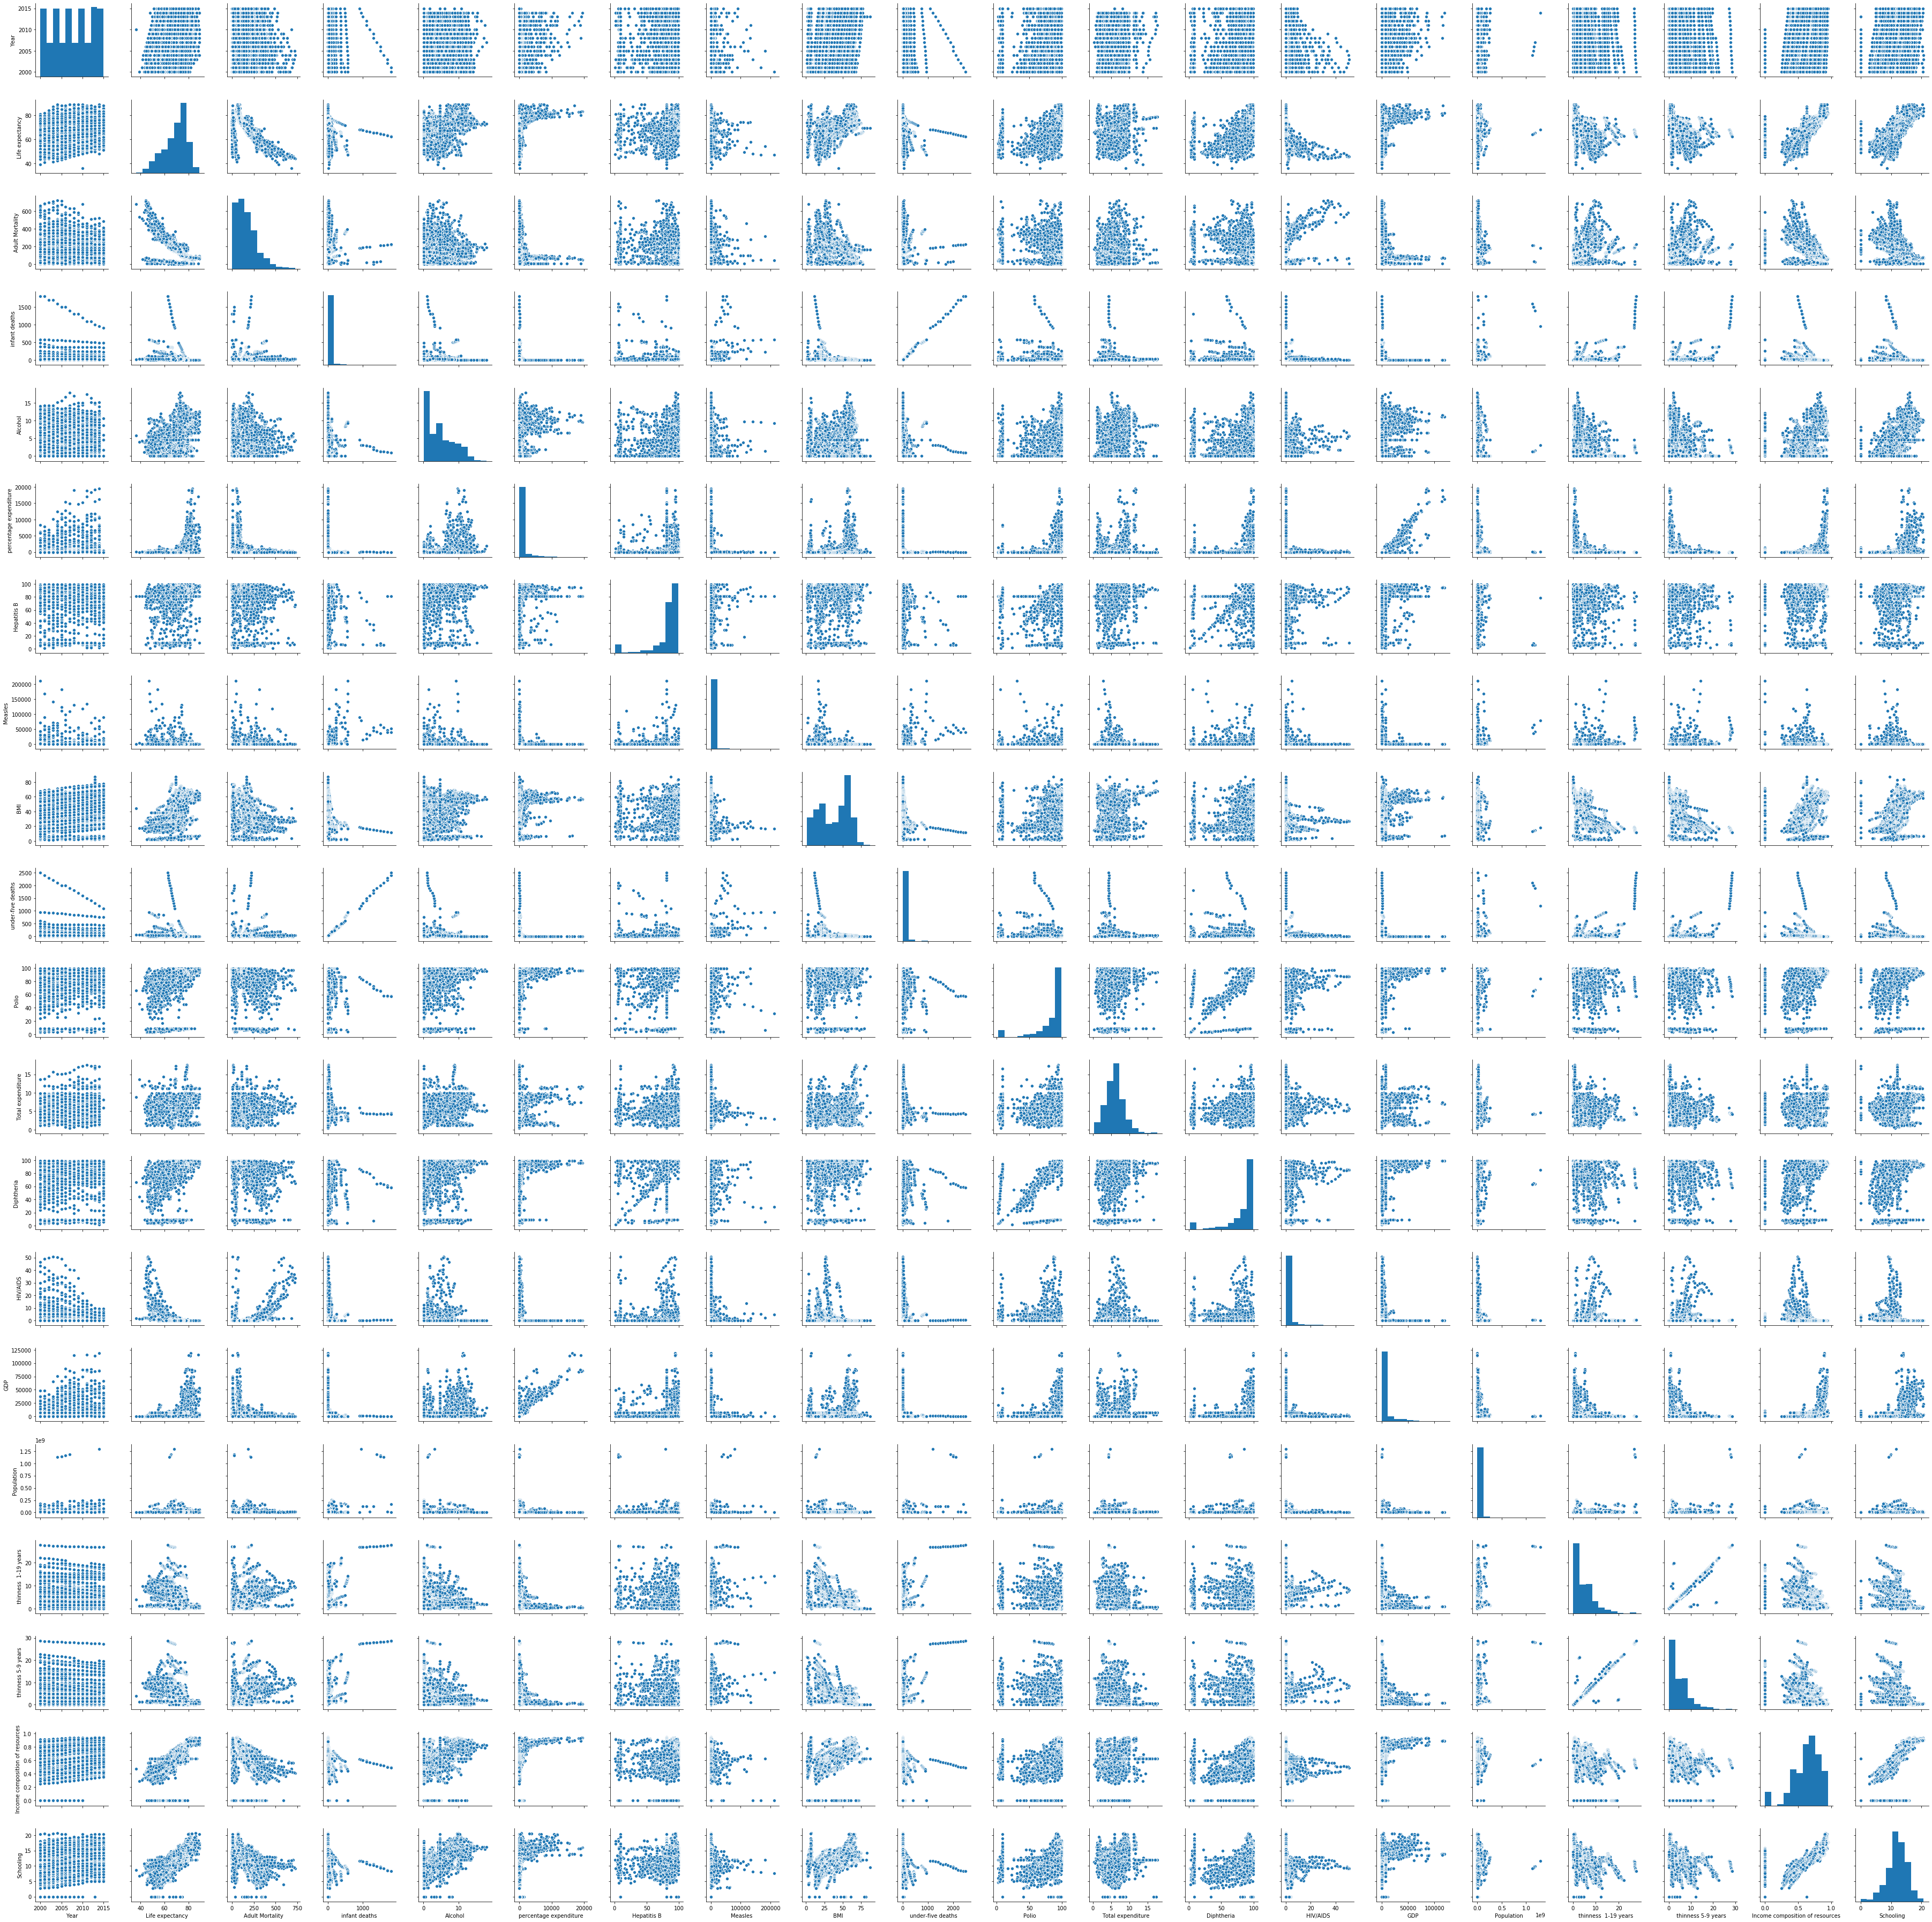

In [102]:
sns.pairplot(life_expectancy_data)

# How has the standard deviation of life expectancy changed over time?

In [104]:
df_4 = life_expectancy_data.copy()
df_4 = df_4.groupby('Year').std()
df_4.head()

Life expectancy   Adult Mortality  infant deaths   Alcohol  \
Year                                                               
2000         10.295528       140.275938     149.285320  3.942625   
2001         10.189630       141.147685     148.416410  3.915644   
2002         10.062469       133.472330     141.030361  3.956564   
2003         10.127681       136.528282     140.246293  3.960509   
2004         10.126409       142.278928     133.027261  4.037282   

      percentage expenditure  Hepatitis B      Measles        BMI   \
Year                                                                 
2000             1256.723594    21.032851  17776.459005  18.744158   
2001             1274.368926    21.967154  16100.646567  18.161368   
2002             1162.688712    22.036932   8591.234477  18.348250   
2003             1210.186804    24.737954  14067.930906  18.478674   
2004             1926.727421    23.707730   9688.322518  18.958261   

      under-five deaths       Polio  Total expenditure  Diphtheria   \
Year                                                                  
2000          209.636215  27.495075           2.104701    29.488424   
2001          201.890335  25.971137           2.055248    27.908500   
2002          194.206932  25.051564           2.137059    24.494670   
2003          186.571738  23.980408           2.157200    25.583139   
2004          179.170516  24.573983           2.258734    25.160880   

       HIV/AIDS           GDP    Population   thinness  1-19 years  \
Year                                                                 
2000   6.973697   8479.444686  2.330784e+07               4.709447   
2001   7.034786   8234.335876  2.049691e+07               4.625413   
2002   7.002383   7925.486492  1.417078e+07               4.712128   
2003   6.927155   8468.267878  2.258137e+07               4.606450   
2004   6.737645  12463.071124  8.622615e+07               4.564903   

       thinness 5-9 years  Income composition of resources  Schooling  
Year                                                                   
2000             4.969160                         0.277808   3.993319  
2001             4.885904                         0.238668   3.562092  
2002             4.833430                         0.239612   3.559374  
2003             4.739578                         0.240497   3.529764  
2004             4.677914                         0.234434   3.428249

# How many countries had decreasing life expectancies per year?

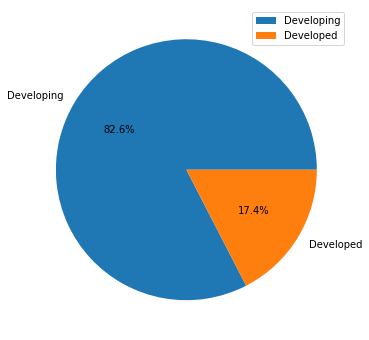

In [105]:
count_test = life_expectancy_data['Status'].value_counts()
labels = life_expectancy_data['Status'].value_counts().index
plt.figure(figsize= (6,6))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

In [111]:
continents = {
    'NA':'North America',
    'SA':'South America',
    'AS':'Asia',
    'OC':'Australia',
    'AF':'Africa',
    'EU':'Europe'
    }

In [112]:
continent = []
for country in life_expectancy_data['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append("Africa")

life_expectancy_data["Continent"] = continent
to_buble = life_expectancy_data[["Country","Year","Life expectancy ","GDP","Population","Continent"]]
to_buble.dropna(inplace=True)

In [113]:
df = px.data.gapminder()
fig = px.scatter(to_buble, x = "GDP", y = "Life expectancy ", size = "Population", color = "Continent",
              hover_name = "Country", log_x = True, size_max = 50)
fig.show()


Correlation map of the features. 1 means positively correlated, -1 means negatively correlated. Infant deaths and Under-Five deaths are positively correlated so we need to drop one of them. GDP and percentage expenditure are highly correlated too. Also thinness 1-19 years and thinness 5-9 are highly correlated. I would like to drop one of the features, if their correlation is bigger than 0.75 or less than -0.75. So I will drop Infant deaths (because under-five also includes it), percentage expenditure (I think GDP has more important informations) and thinness 5-9 years (because thinness 1-19 also includes it) as well as Income composition of resources which has 0.78 correlation with Schooling.

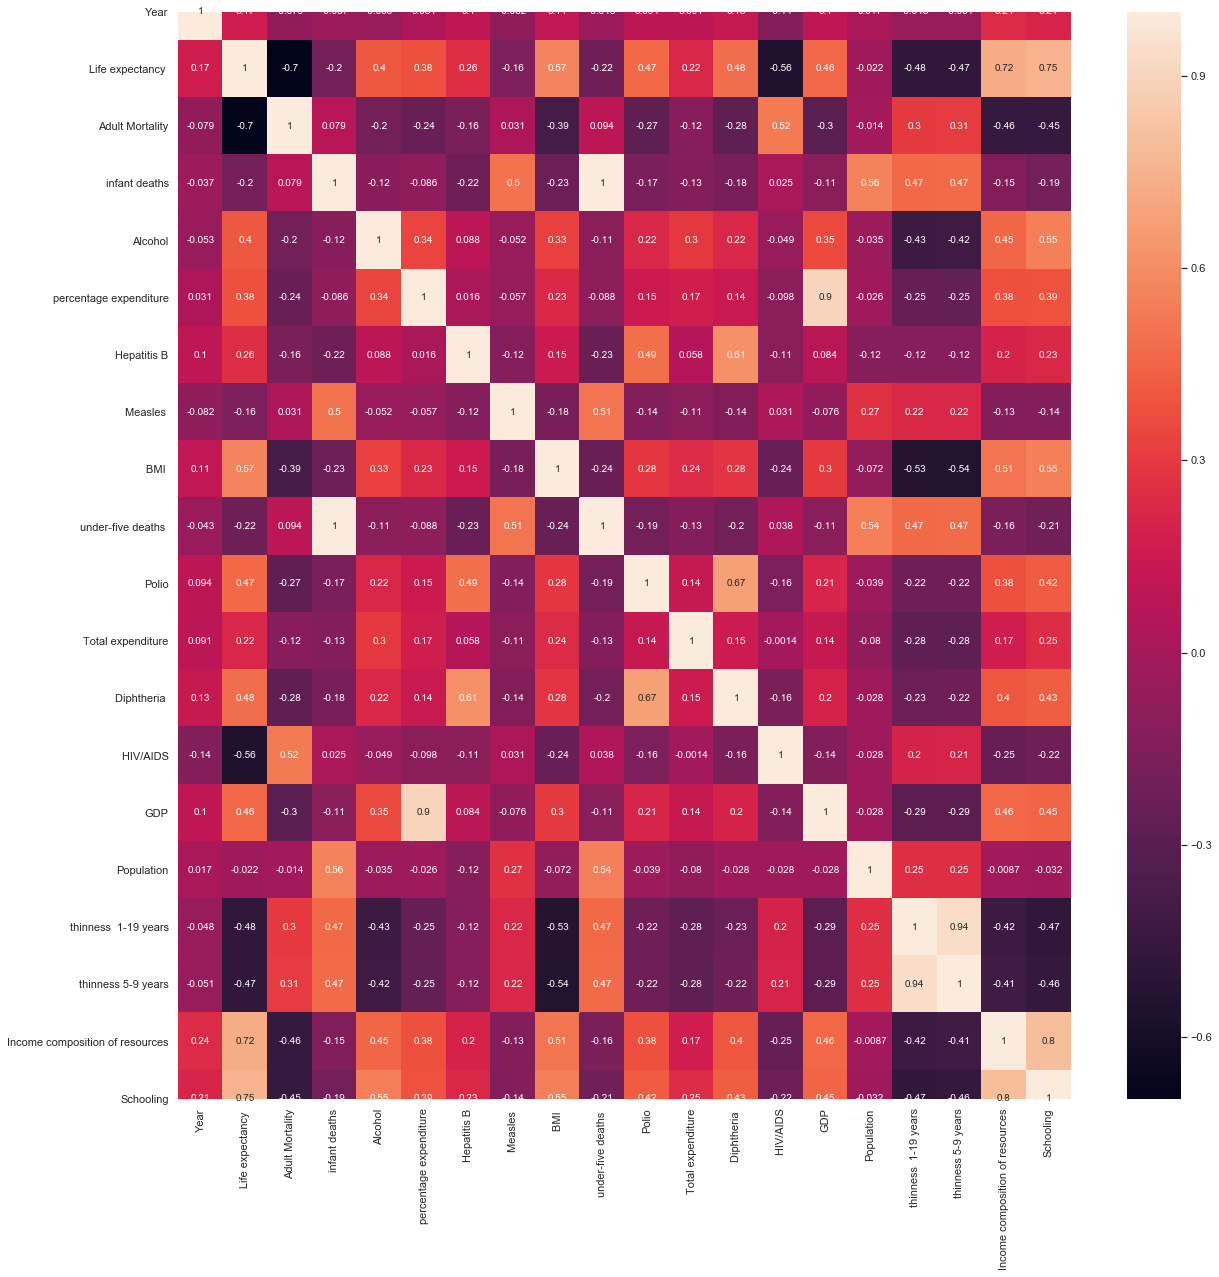

In [171]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(life_expectancy_data.corr(), annot=True, ax=ax)
plt.show()

In [172]:
life_expectancy_data.isnull()

Country   Year  Status  Life expectancy   Adult Mortality  \
0       False  False   False             False            False   
1       False  False   False             False            False   
2       False  False   False             False            False   
3       False  False   False             False            False   
4       False  False   False             False            False   
...       ...    ...     ...               ...              ...   
2933    False  False   False             False            False   
2934    False  False   False             False            False   
2935    False  False   False             False            False   
2936    False  False   False             False            False   
2937    False  False   False             False            False   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             False    False                   False        False     False   
1             False    False                   False        False     False   
2             False    False                   False        False     False   
3             False    False                   False        False     False   
4             False    False                   False        False     False   
...             ...      ...                     ...          ...       ...   
2933          False    False                   False        False     False   
2934          False    False                   False        False     False   
2935          False    False                   False        False     False   
2936          False    False                   False        False     False   
2937          False    False                   False        False     False   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS    GDP  \
0     ...  False              False        False      False  False   
1     ...  False              False        False      False  False   
2     ...  False              False        False      False  False   
3     ...  False              False        False      False  False   
4     ...  False              False        False      False  False   
...   ...    ...                ...          ...        ...    ...   
2933  ...  False              False        False      False  False   
2934  ...  False              False        False      False  False   
2935  ...  False              False        False      False  False   
2936  ...  False              False        False      False  False   
2937  ...  False              False        False      False  False   

      Population   thinness  1-19 years   thinness 5-9 years  \
0          False                  False                False   
1          False                  False                False   
2          False                  False                False   
3          False                  False                False   
4          False                  False                False   
...          ...                    ...                  ...   
2933       False                  False                False   
2934       False                  False                False   
2935       False                  False                False   
2936       False                  False                False   
2937       False                  False                False   

      Income composition of resources  Schooling  
0                               False      False  
1                               False      False  
2                               False      False  
3                               False      False  
4                               False      False  
...                               ...        ...  
2933                            False      False  
2934                            False      False  
2935                            False      False  
2936                            False      False  
2937                            False      False  

[2938 rows x 22 columns]

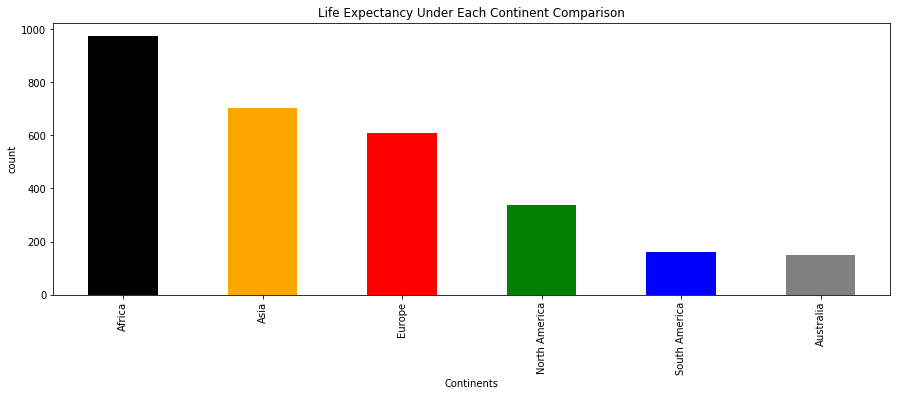

In [118]:
plt.subplots(figsize=(15,5))
life_expectancy_data['Continent'].value_counts(normalize = True)
life_expectancy_data['Continent'].value_counts(dropna = False).plot.bar(color=['black','orange','red','green','blue','grey'])
plt.title('Life Expectancy Under Each Continent Comparison')
plt.xlabel('Continents')
plt.ylabel('count')
plt.show()

In [119]:
life_expectancy_data['Continent'].value_counts()

Africa           976
Asia             704
Europe           610
North America    338
South America    160
Australia        150
Name: Continent, dtype: int64

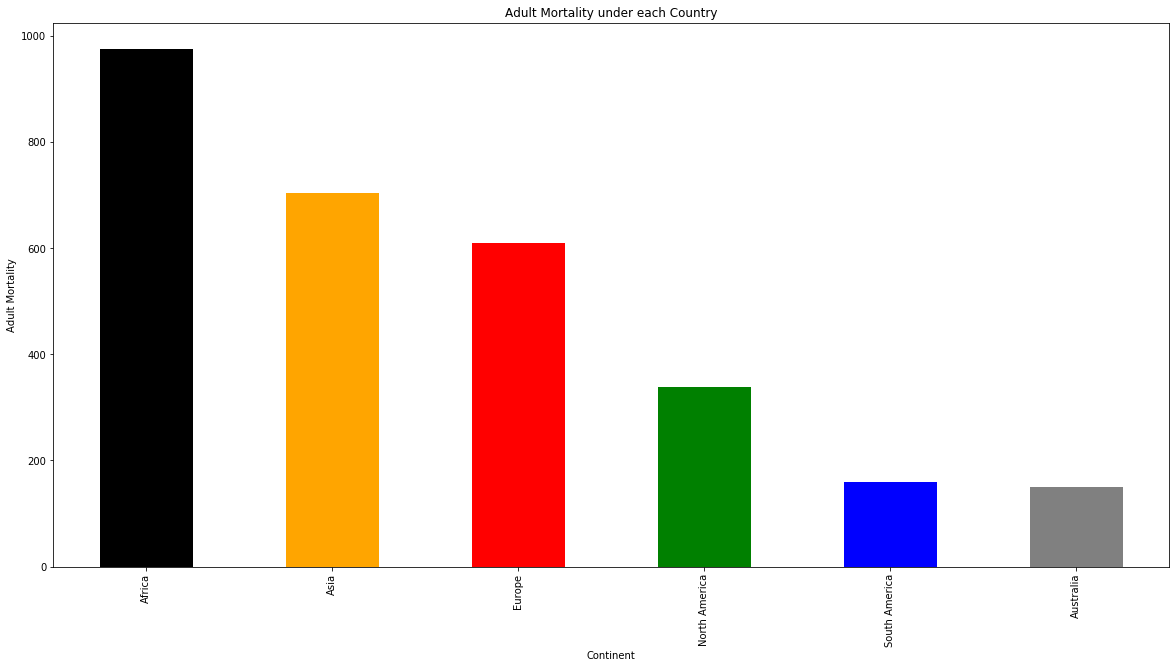

In [120]:
plt.subplots(figsize = (15,5))
life_expectancy_data['Adult Mortality'].value_counts(normalize = True)
life_expectancy_data['Continent'].value_counts(dropna = False).plot.bar(figsize=(20,10),color=['black','orange','red','green','blue','grey'])
plt.title('Adult Mortality under each Country')
plt.xlabel('Continent')
plt.ylabel('Adult Mortality')
plt.show()

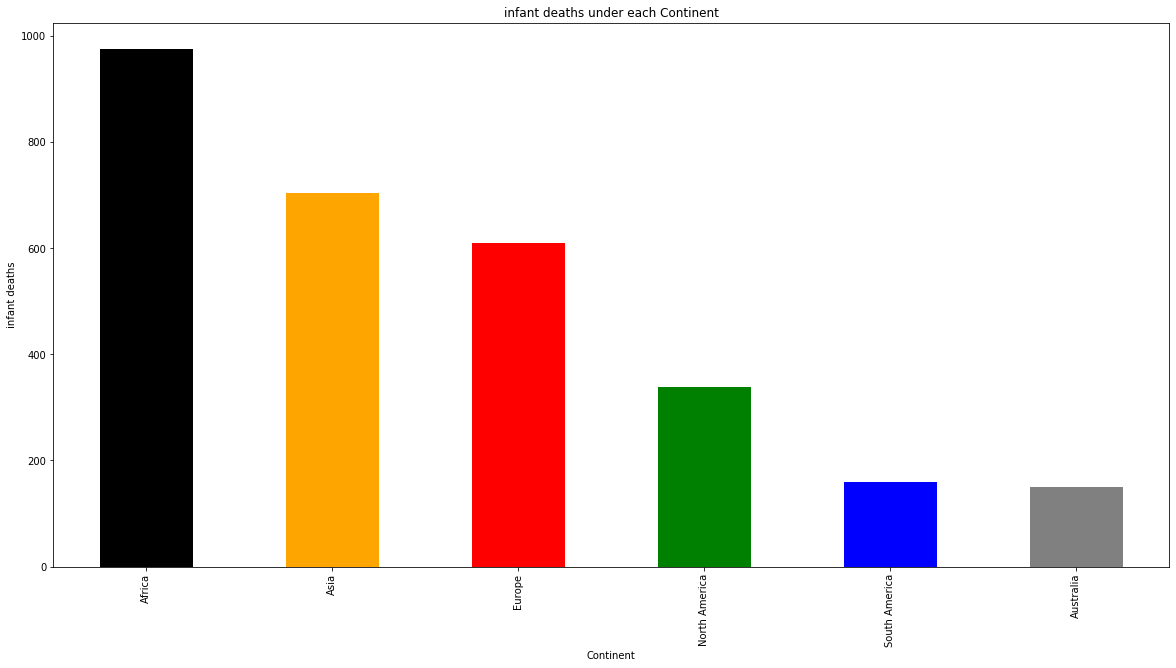

In [122]:
plt.subplots(figsize = (15,5))
life_expectancy_data['infant deaths'].value_counts(normalize = True)
life_expectancy_data['Continent'].value_counts(dropna = False).plot.bar(figsize=(20,10),color=['black','orange','red','green','blue','grey'])
plt.title('infant deaths under each Continent')
plt.xlabel('Continent')
plt.ylabel('infant deaths')
plt.show()

In [ ]:
s = [
    life_expectancy_data['Life Expectancy '].dropna(),
    life_expectancy_data['Income composition of resources'].dropna(),
    life_expectancy_data['Schooling'].dropna()
]

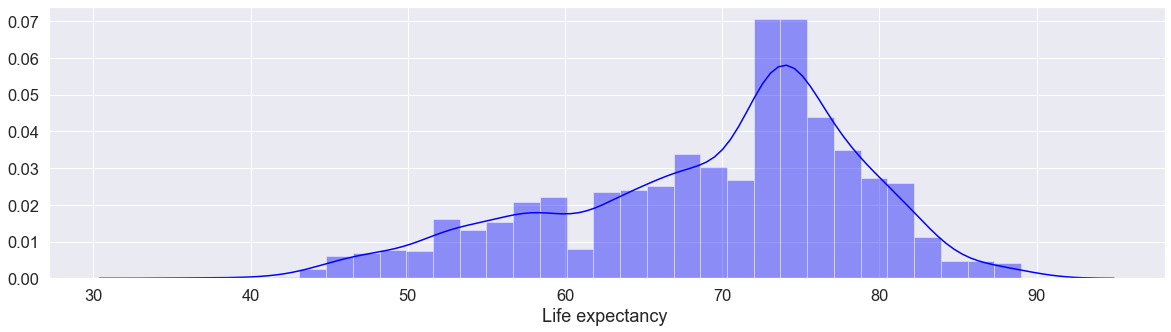

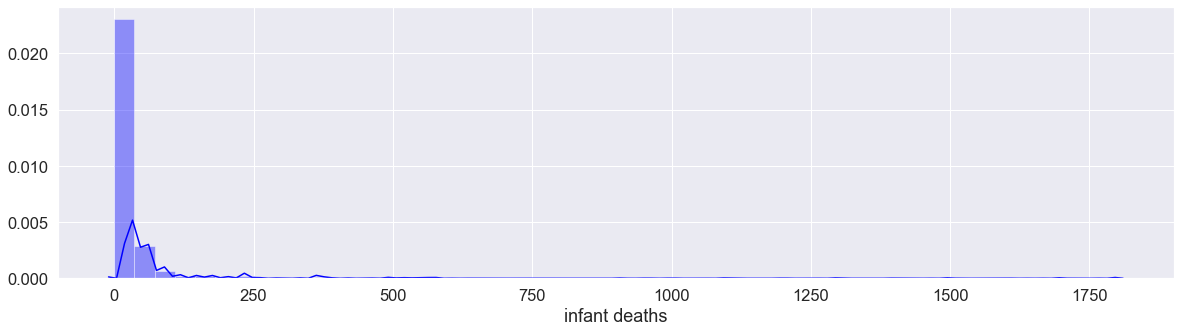

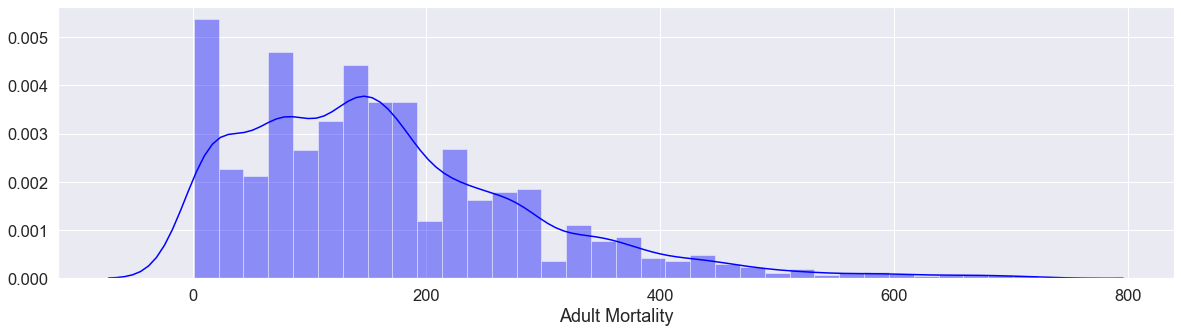

In [210]:
for i in s:
    plt.figure(figsize = (20, 5))
    sns.distplot(i, kde=True, color='blue')

In [ ]:
l = [
    life_expectancy_data['Life Expectancy '].dropna(),
    life_expectancy_data['Income composition of resources'].dropna(),
    life_expectancy_data['Schooling'].dropna()
]

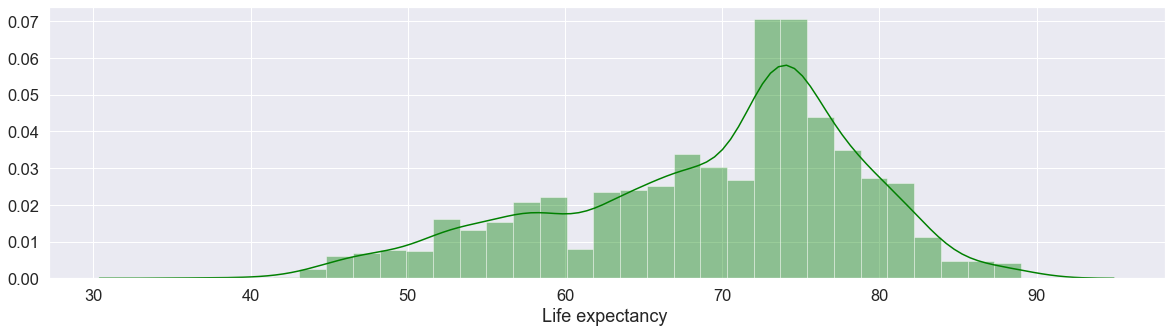

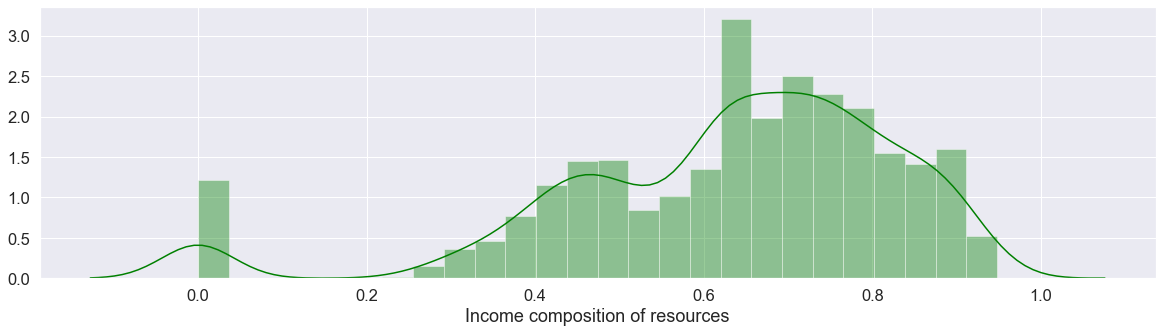

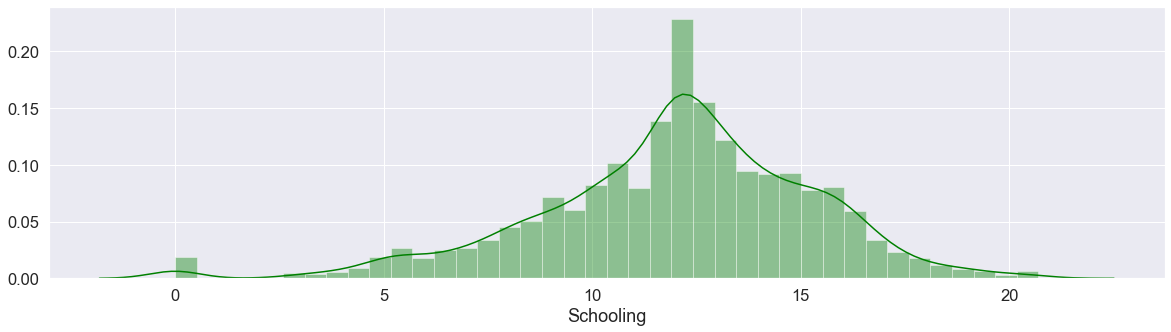

In [225]:
for i in l:
    plt.figure(figsize = (20, 5))
    sns.distplot(i, kde=True, color='green')

In [220]:
life_expectancy_data['Schooling'].value_counts()

12.9    44
12.5    35
12.8    33
12.3    31
10.7    31
        ..
7.0      1
19.8     1
6.0      1
17.0     1
20.4     1
Name: Schooling, Length: 147, dtype: int64

In [132]:
# Converting Categorial values into Numerical values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
life_expectancy_data['Country']=labelencoder.fit_transform(life_expectancy_data['Country'])
life_expectancy_data['Year']=labelencoder.fit_transform(life_expectancy_data['Year'])
life_expectancy_data['Status']=labelencoder.fit_transform(life_expectancy_data['Status'])
life_expectancy_data.head()

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0        0    15       1              65.0            263.0             62   
1        0    14       1              59.9            271.0             64   
2        0    13       1              59.9            268.0             66   
3        0    12       1              59.5            272.0             69   
4        0    11       1              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0     0.01               71.279624         65.0      1154  ...   
1     0.01               73.523582         62.0       492  ...   
2     0.01               73.219243         64.0       430  ...   
3     0.01               78.184215         67.0      2787  ...   
4     0.01                7.097109         68.0      3013  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Continent  
0                            0.479       10.1       Asia  
1                            0.476       10.0       Asia  
2                            0.470        9.9       Asia  
3                            0.463        9.8       Asia  
4                            0.454        9.5       Asia  

[5 rows x 23 columns]

# Life Expectancy has a dense distribution between 70 -76 years

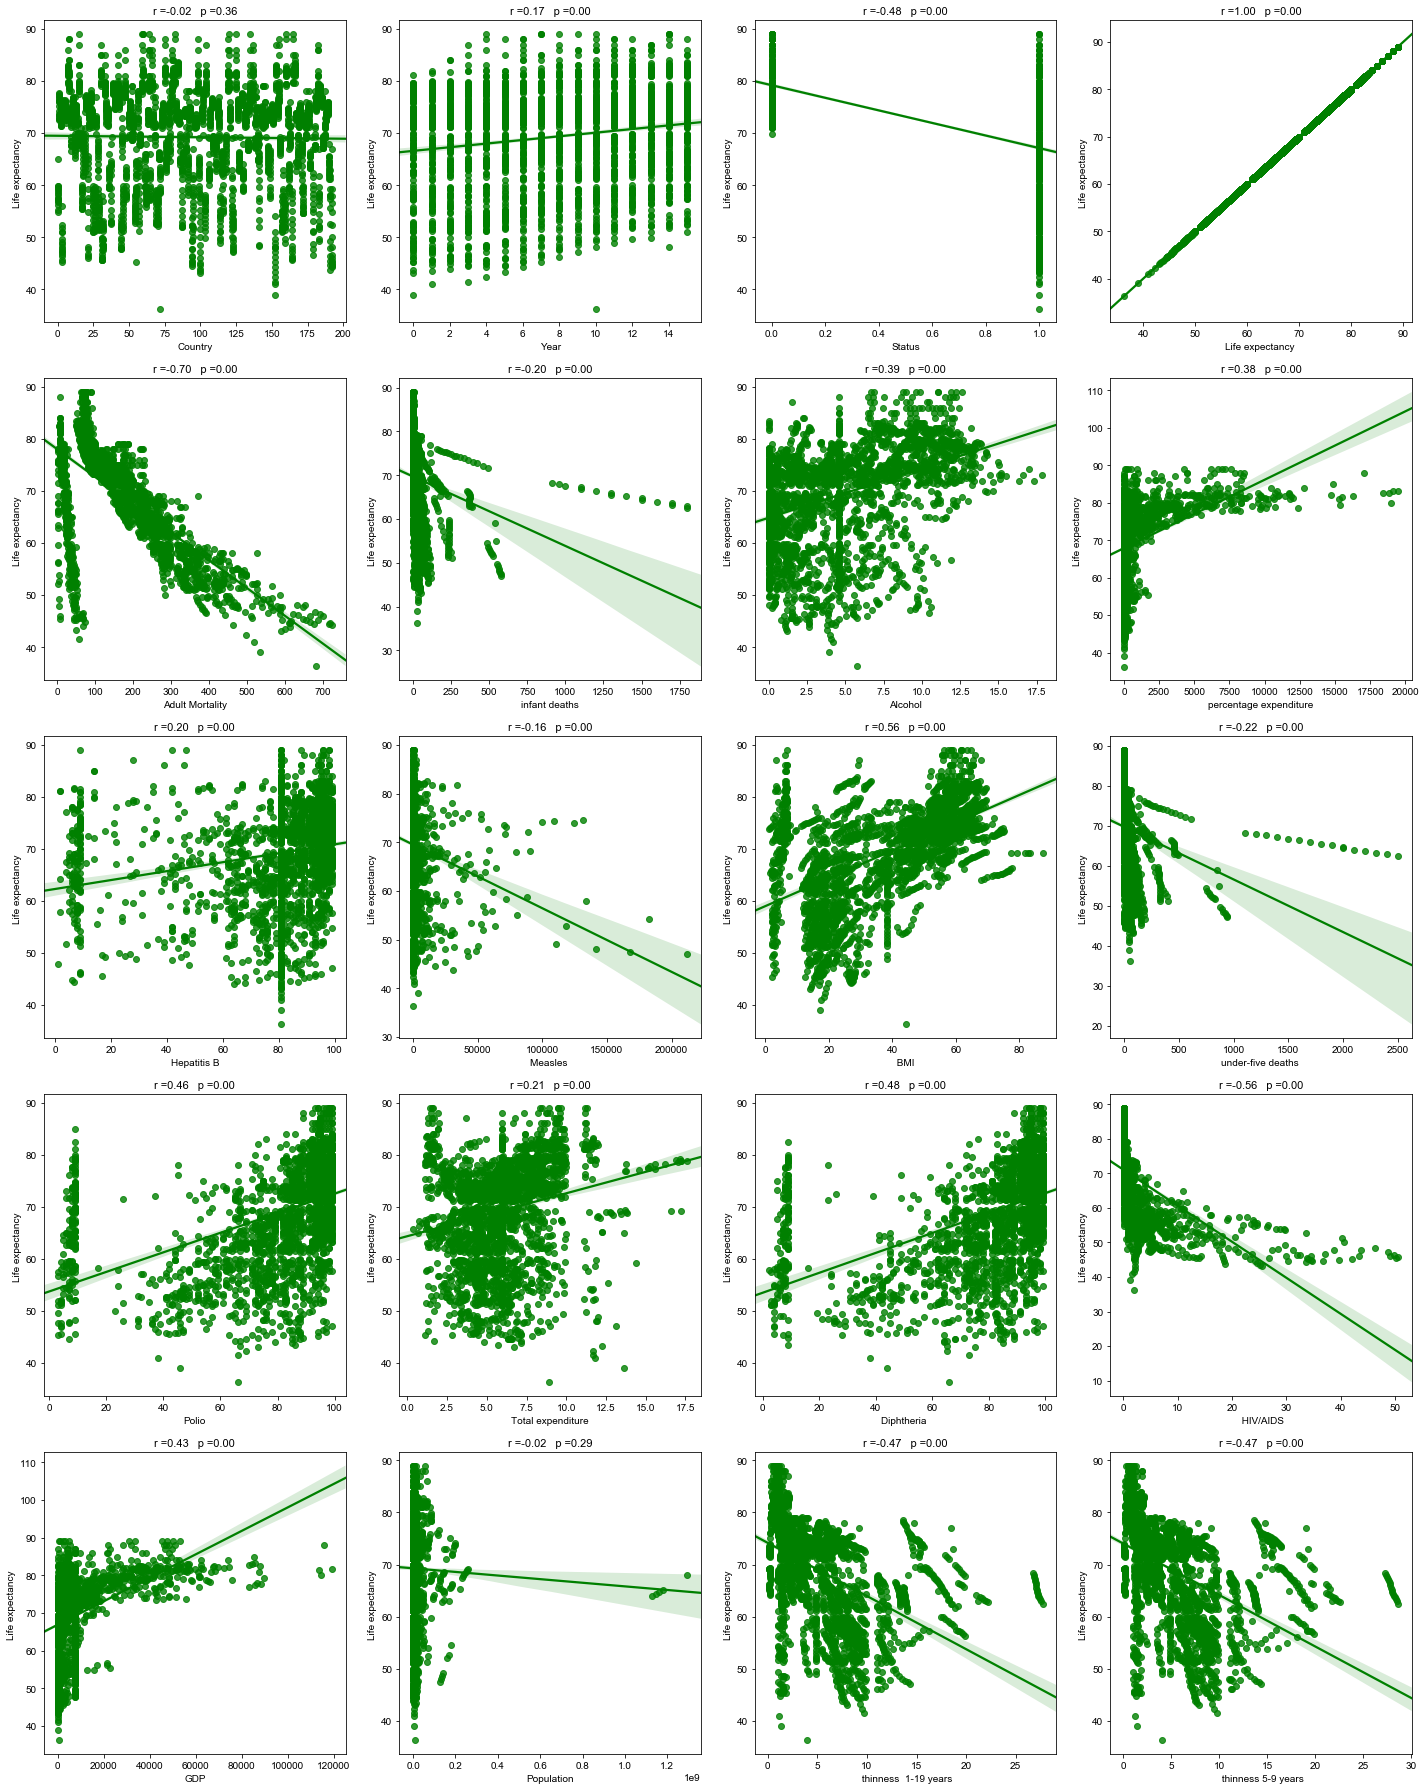

In [133]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows,nr_cols, figsize = (nr_cols*5,nr_rows*5))
numerical_feats = life_expectancy_data.dtypes[life_expectancy_data.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
life_expectancy_data.dropna(inplace = True)

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = life_expectancy_data[li_plot_num_feats[i]], y = life_expectancy_data["Life expectancy "], color = 'green', ax = axs[r][c])
            stp = stats.pearsonr(life_expectancy_data[li_plot_num_feats[i]], life_expectancy_data["Life expectancy "])
            str_title = "r =" + "{0:.2f}".format(stp[0]) +"   ""p =" + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize = 11)
            
plt.tight_layout()
sns.set(color_codes = True)
plt.show()

# Checking the impact of Alcohol consumption over Life expectancy for all the different continents

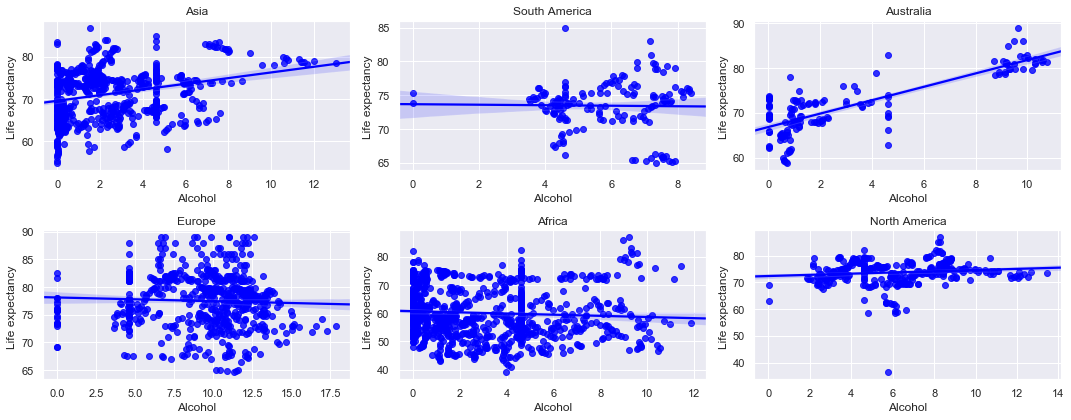

In [134]:
fig, axs = plt.subplots(2,3, figsize=(15,6), facecolor = 'w', edgecolor ='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(life_expectancy_data['Continent']), axs.flat):
    Conts = life_expectancy_data[life_expectancy_data['Continent'] == conts]
    sns.regplot(x = Conts['Alcohol'], y = Conts["Life expectancy "], color = 'blue', ax = ax).set_title(conts)
    
plt.tight_layout()
sns.set(color_codes = True)
plt.show()

# Life expectancy Estimation or Prediction Regression Model

In [135]:
sinakekelwe = life_expectancy_data["Life expectancy "]
features = life_expectancy_data[life_expectancy_data.columns.difference(["Life expectancy "])]
X_train,X_test, Y_train,Y_test = train_test_split(pd.get_dummies(features), sinakekelwe, test_size=0.3)

# Random Search Cross Validation

In [136]:
rf = RandomForestRegressor(random_state = 42)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [137]:
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]# Number of trees in random forest
max_features = ['auto','sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2,5,10]# Minimum number of samples required to split a node
min_samples_leaf = [1,2,4]#Minimum number of samples required at each leaf node
bootstrap = [True,False]

# Creating the random grid
random_grid = { 
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [138]:
rf_random= RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [139]:
rf_random

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [147]:
#rf_random.best_params_

In [148]:
def evaluate(model,test_features,test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Errors: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}% .'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()
base_model.fit(X_test,Y_test)
base_accuracy = evaluate(base_model,X_test,Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,X_test,Y_test)
print('Improvement of {:0.2f}%.'.format(100 *(random_accuracy - base_accuracy)/base_accuracy))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Model Performance
Average Errors: 0.7009 degrees.
Accuracy = 98.96% .


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [149]:
param_grid = { 
               'n_estimators': [10,30,100,120,150],
               'max_features': [2,3,4, 'auto','sqrt'],
               'max_depth': [10,20,50,None],
               'min_samples_split': [2,4,8],
               'min_samples_leaf': [1,3,5],
               'bootstrap': [True,False]
}
pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, None],
 'max_features': [2, 3, 4, 'auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [10, 30, 100, 120, 150]}


In [150]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [151]:
life_expectancy_data.fillna(0)

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0           0    15       1              65.0            263.0             62   
1           0    14       1              59.9            271.0             64   
2           0    13       1              59.9            268.0             66   
3           0    12       1              59.5            272.0             69   
4           0    11       1              59.2            275.0             71   
...       ...   ...     ...               ...              ...            ...   
2933      192     4       1              44.3            723.0             27   
2934      192     3       1              44.5            715.0             26   
2935      192     2       1              44.8             73.0             25   
2936      192     1       1              45.3            686.0             25   
2937      192     0       1              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0        0.01               71.279624         65.0      1154  ...   
1        0.01               73.523582         62.0       492  ...   
2        0.01               73.219243         64.0       430  ...   
3        0.01               78.184215         67.0      2787  ...   
4        0.01                7.097109         68.0      3013  ...   
...       ...                     ...          ...       ...  ...   
2933     4.36                0.000000         68.0        31  ...   
2934     4.06                0.000000          7.0       998  ...   
2935     4.43                0.000000         73.0       304  ...   
2936     1.72                0.000000         76.0       529  ...   
2937     1.68                0.000000         79.0      1483  ...   

      Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0                  8.16         65.0        0.1  584.259210  33736494.0   
1                  8.18         62.0        0.1  612.696514    327582.0   
2                  8.13         64.0        0.1  631.744976  31731688.0   
3                  8.52         67.0        0.1  669.959000   3696958.0   
4                  7.87         68.0        0.1   63.537231   2978599.0   
...                 ...          ...        ...         ...         ...   
2933               7.13         65.0       33.6  454.366654  12777511.0   
2934               6.52         68.0       36.7  453.351155  12633897.0   
2935               6.53         71.0       39.8   57.348340    125525.0   
2936               6.16         75.0       42.1  548.587312  12366165.0   
2937               7.10         78.0       43.5  547.358879  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  Continent  
0                               0.479       10.1       Asia  
1                               0.476       10.0       Asia  
2                               0.470        9.9       Asia  
3                               0.463        9.8       Asia  
4                               0.454        9.5       Asia  
...                               ...        ...        ...  
2933                            0.407        9.2     Africa  
2934                            0.418        9.5     Africa  
2935                            0.427       10.0     Africa  
2936                            0.427        9.8     Afric

In [152]:
life_expectancy_data.dropna()

Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0           0    15       1              65.0            263.0             62   
1           0    14       1              59.9            271.0             64   
2           0    13       1              59.9            268.0             66   
3           0    12       1              59.5            272.0             69   
4           0    11       1              59.2            275.0             71   
...       ...   ...     ...               ...              ...            ...   
2933      192     4       1              44.3            723.0             27   
2934      192     3       1              44.5            715.0             26   
2935      192     2       1              44.8             73.0             25   
2936      192     1       1              45.3            686.0             25   
2937      192     0       1              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0        0.01               71.279624         65.0      1154  ...   
1        0.01               73.523582         62.0       492  ...   
2        0.01               73.219243         64.0       430  ...   
3        0.01               78.184215         67.0      2787  ...   
4        0.01                7.097109         68.0      3013  ...   
...       ...                     ...          ...       ...  ...   
2933     4.36                0.000000         68.0        31  ...   
2934     4.06                0.000000          7.0       998  ...   
2935     4.43                0.000000         73.0       304  ...   
2936     1.72                0.000000         76.0       529  ...   
2937     1.68                0.000000         79.0      1483  ...   

      Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0                  8.16         65.0        0.1  584.259210  33736494.0   
1                  8.18         62.0        0.1  612.696514    327582.0   
2                  8.13         64.0        0.1  631.744976  31731688.0   
3                  8.52         67.0        0.1  669.959000   3696958.0   
4                  7.87         68.0        0.1   63.537231   2978599.0   
...                 ...          ...        ...         ...         ...   
2933               7.13         65.0       33.6  454.366654  12777511.0   
2934               6.52         68.0       36.7  453.351155  12633897.0   
2935               6.53         71.0       39.8   57.348340    125525.0   
2936               6.16         75.0       42.1  548.587312  12366165.0   
2937               7.10         78.0       43.5  547.358879  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  Continent  
0                               0.479       10.1       Asia  
1                               0.476       10.0       Asia  
2                               0.470        9.9       Asia  
3                               0.463        9.8       Asia  
4                               0.454        9.5       Asia  
...                               ...        ...        ...  
2933                            0.407        9.2     Africa  
2934                            0.418        9.5     Africa  
2935                            0.427       10.0     Africa  
2936                            0.427        9.8     Afric

In [153]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 21.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [154]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test,Y_test)
print('Improvement of {:0.2f}%.'.format(100 *(grid_accuracy - base_accuracy)/base_accuracy))

{'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Model Performance
Average Errors: 1.0564 degrees.
Accuracy = 98.44% .
Improvement of -0.53%.


In [155]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test

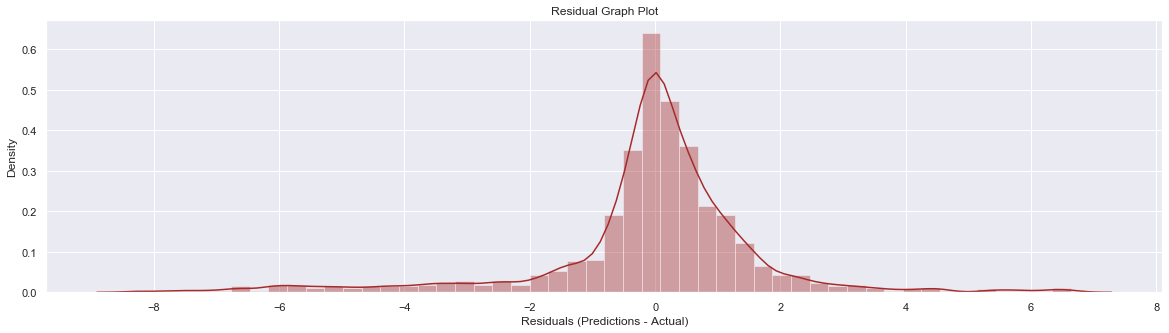

In [156]:
plt.figure(figsize=(20,5))
sns.distplot(residuals, kde=True, color='brown')
plt.title('Residual Graph Plot')
plt.xlabel('Residuals (Predictions - Actual)')
plt.ylabel('Density')
plt.show()

In [157]:
print("R-squared Score obtained for Predicting Life Expectancy is {0}".format(r2_score(Y_test,model_predictions)))

R-squared Score obtained for Predicting Life Expectancy is 0.9649812919075508


In [163]:
# Put models in a dictionary
models = { "Linear Regression": LinearRegression(), 
           "Random Forest": RandomForestRegressor(),
           "Decision tree": DecisionTreeRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    Y_train : labels assosciated with training data
    Y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(101)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [164]:
# Evaluate the Model Scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



{'Linear Regression': 0.8269515213246902,
 'Random Forest': 0.9543157752594978,
 'Decision tree': 0.9150919470011675}

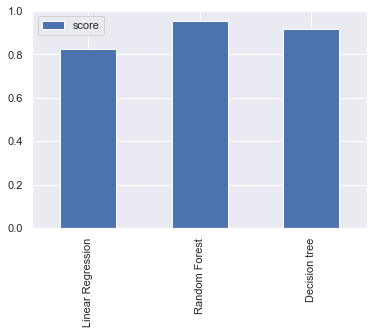

In [165]:
model_compare = pd.DataFrame(model_scores, index=['score'])
model_compare.T.plot.bar();

# Hyerparameter tuning with RandomizedSearchCV

In [166]:
# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                              random_state=42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.8s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state...


In [167]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_features=0.5,
                                    max_depth=10,
                                    n_jobs=-1,
                                    random_state=101)

# Fit the ideal model
ideal_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                      oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [168]:
ideal_model.score(X_test, Y_test)

0.9564611894892975

In [169]:
# Make predictions on test data
y_preds=ideal_model.predict(X_test)
y_preds

array([63.86528661, 82.55902899, 66.5189774 , 52.95046188, 63.56031896,
       83.38065438, 72.91785092, 64.2427185 , 79.71590462, 78.57298335,
       52.21741297, 74.31241713, 74.19732853, 67.25544869, 69.93766859,
       63.46219794, 72.50650492, 56.55138511, 62.57370103, 63.65615174,
       69.64670402, 58.29669444, 62.07615505, 78.28981575, 70.42678249,
       83.45626916, 70.50852181, 72.31069105, 81.03701328, 67.7187892 ,
       79.92449871, 69.426096  , 68.50335615, 68.69907611, 68.59248371,
       74.63332166, 72.11771098, 74.52979998, 65.29040075, 69.45776389,
       61.42402644, 81.06133293, 49.09482949, 73.58069444, 69.6058663 ,
       65.48061715, 82.49686713, 73.02938832, 67.28727443, 54.05196941,
       79.09204428, 73.77880163, 67.47625522, 73.52014064, 69.10189638,
       64.82736495, 70.42463076, 50.27159107, 74.37627742, 79.61049001,
       64.18040734, 73.85653821, 74.31872496, 80.36174507, 48.14805964,
       66.42418803, 55.87649671, 47.92938889, 52.3267159 , 68.40

In [170]:
Y_test

1198    63.7
1252    81.0
947     65.5
2419    51.9
1730    63.2
        ... 
2049    75.0
982     73.9
2754    75.6
2498    47.8
547     79.9
Name: Life expectancy , Length: 882, dtype: float64

# Evaluating the Model

In [173]:
print("Mean squared error: %.2f"% mean_squared_error(Y_test, y_preds))
print("Mean absolute error: %.2f"% mean_absolute_error(Y_test, y_preds))
print('R_square score: %.2f' % r2_score(Y_test, y_preds))

Mean squared error: 3.83
Mean absolute error: 1.29
R_square score: 0.96


# Feature Importance

In [174]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([1.95808273e-02, 3.49787228e-01, 7.92179866e-03, 1.34516090e-02,
       2.37924027e-01, 7.22086557e-03, 3.97111922e-03, 1.79755495e-02,
       3.28102304e-03, 1.91615207e-03, 2.05836814e-01, 2.26108485e-03,
       1.54352835e-02, 3.19983554e-03, 5.04290712e-02, 6.98014812e-03,
       5.20187754e-03, 6.15440189e-03, 7.03596991e-03, 4.68758398e-03,
       1.34829108e-02, 1.25167912e-02, 5.57771211e-04, 7.75785022e-04,
       3.00375014e-04, 2.02176934e-03, 9.23270644e-05])

In [175]:
# Function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

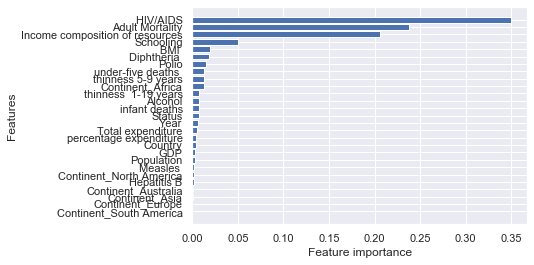

In [176]:
plot_features(X_train.columns, ideal_model.feature_importances_)

Dividing the dataset into train, validation and test sets. %80 training set, %10 validation set, %10 test set.

In [177]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(life_expectancy_data, y, test_size=0.2, random_state=42)
x_valid, X_test, y_valid, Y_test = model_selection.train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
print(f'X_train shape -->{X_train.shape}')
print(f'X_valid shape -->{x_valid.shape}')
print(f'X_test shape -->{X_test.shape}')
print(f'y_train shape -->{Y_train.shape}')
print(f'y_valid shape -->{y_valid.shape}')
print(f'y_test shape -->{Y_test.shape}')

NameError: name 'model_selection' is not defined